# Data exploration and enrichment for supervised classification of the Hepatocellular Carcinoma Dataset

## Table of contents <a id="Table-of-contents"></a>

1. [Introduction](#Introduction)
2. [Data Exploration](#Data-Exploration)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Data Modeling (Supervised Learning)](#Data-Modeling-Supervised-Learning)
5. [Data Evaluation](#Data-Evaluation)
6. [Interpretation of Results](#Interpretation-of-Results)


## Introduction <a id="Introduction"></a>

## Data Exploration <a id="Data-Exploration"></a>

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import VarianceThreshold

In [121]:
df = pd.read_csv("hcc_dataset.csv")


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          165 non-null    object
 1   Symptoms        165 non-null    object
 2   Alcohol         165 non-null    object
 3   HBsAg           165 non-null    object
 4   HBeAg           165 non-null    object
 5   HBcAb           165 non-null    object
 6   HCVAb           165 non-null    object
 7   Cirrhosis       165 non-null    object
 8   Endemic         165 non-null    object
 9   Smoking         165 non-null    object
 10  Diabetes        165 non-null    object
 11  Obesity         165 non-null    object
 12  Hemochro        165 non-null    object
 13  AHT             165 non-null    object
 14  CRI             165 non-null    object
 15  HIV             165 non-null    object
 16  NASH            165 non-null    object
 17  Varices         165 non-null    object
 18  Spleno    

<h3>Number of Features/Records<h3\>

In [123]:

df.shape

(165, 50)

There are 49 features and 165 records.

<h3>Class Distribution<h3\>

In [124]:
df['Class'].value_counts()

Class
Lives    102
Dies      63
Name: count, dtype: int64

The data set is inbalanced.

<h3>Attribute Analysis<h3\>

Categorical Attributes: Gender;
                    	Symptoms;
                        Alcohol;
                        HBsAg;
                        HBeAg;
                        HBcAb;
                        HCVAb;
                        Cirrhosis;
                        Endemic;
                        Smoking;
                        Diabetes;
                        Obesity;
                        Hemochro;
                        AHT;
                        CRI;
                        HIV;
                        NASH;
                        Varices;
                        Spleno;
                        PHT;
                        PVT;
                        Metastasis;
                        Hallmark;
                        PS;
                        Encephalopathy;
                        Ascites.
                        
Numerical Attributes: 	Age; Grams_day; Packs_year; INR; AFP; Hemoglobin; MCV; Leucocytes; Platelets; Albumin; Total_Bil; ALT; AST; GGT; ALP; TP; Creatinine; Nodules; Major_Dim; Dir_Bil; Iron; Sat; Ferritin.

<h5>Categorical Attributes<h5\>

/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


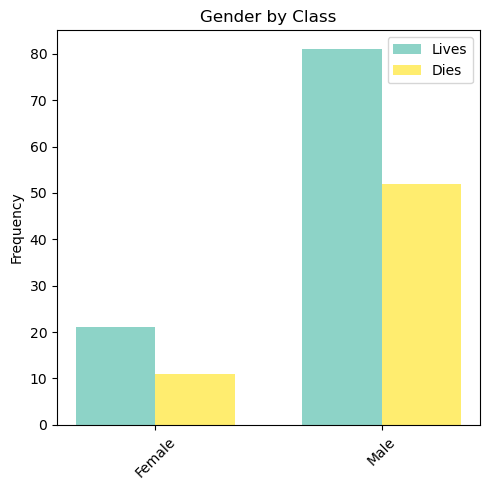

Gender by Class: 
Gender
Female    11
Male      52
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


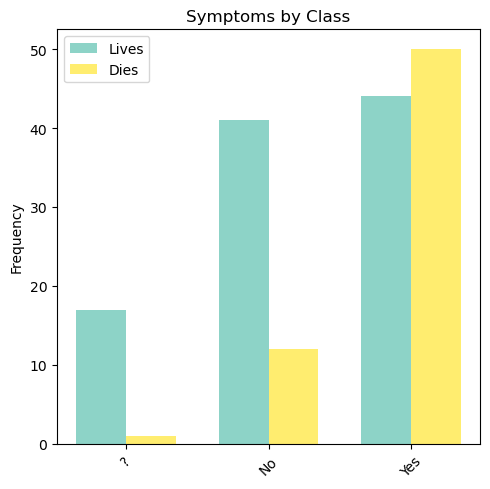

Symptoms by Class: 
Symptoms
?       1
No     12
Yes    50
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


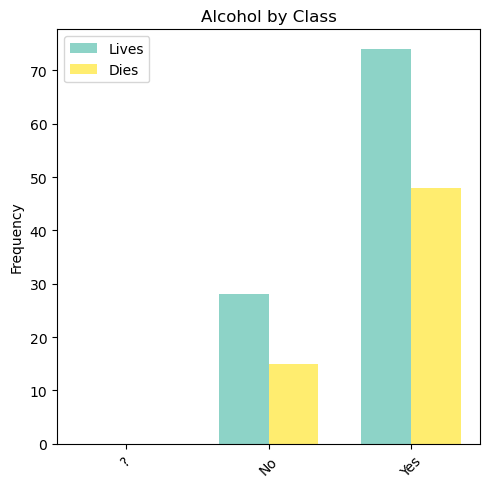

Alcohol by Class: 
Alcohol
?       0
No     15
Yes    48
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


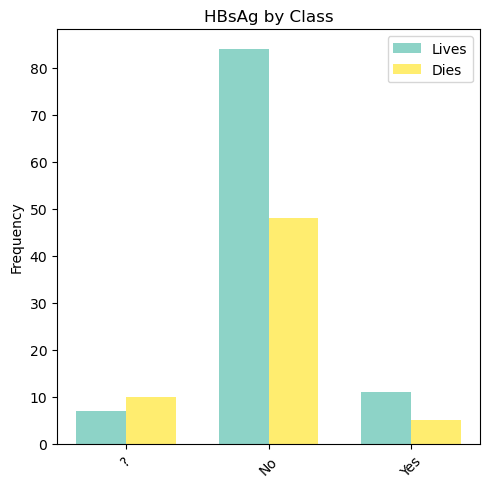

HBsAg by Class: 
HBsAg
?      10
No     48
Yes     5
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


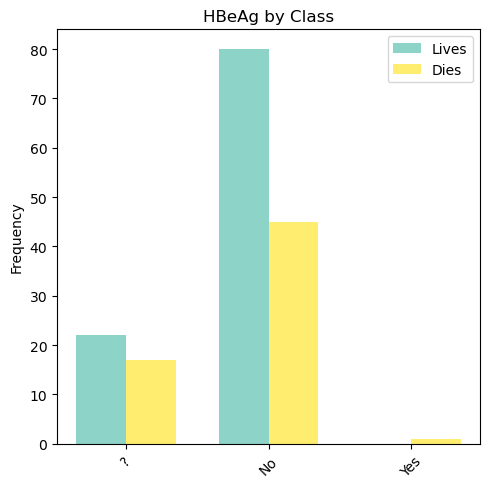

HBeAg by Class: 
HBeAg
?      17
No     45
Yes     1
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


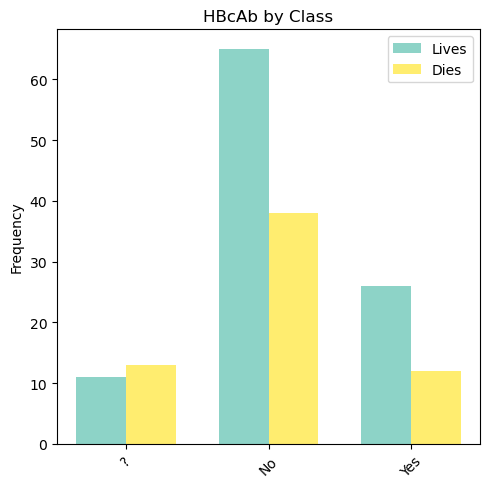

HBcAb by Class: 
HBcAb
?      13
No     38
Yes    12
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


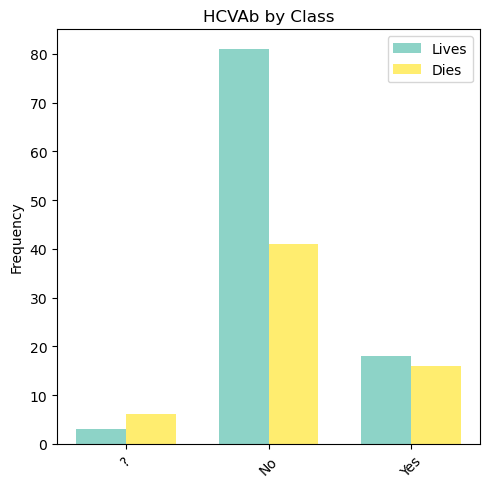

HCVAb by Class: 
HCVAb
?       6
No     41
Yes    16
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


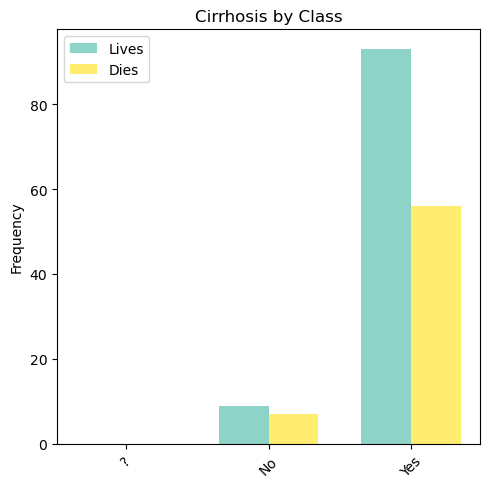

Cirrhosis by Class: 
Cirrhosis
?       0
No      7
Yes    56
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


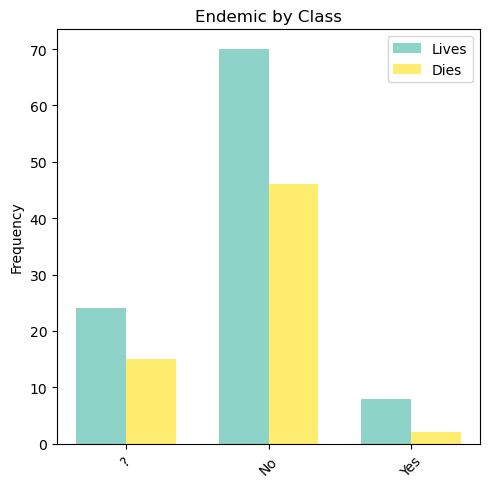

Endemic by Class: 
Endemic
?      15
No     46
Yes     2
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


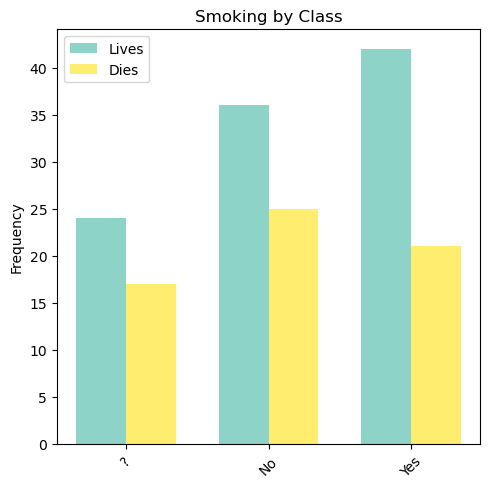

Smoking by Class: 
Smoking
?      17
No     25
Yes    21
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


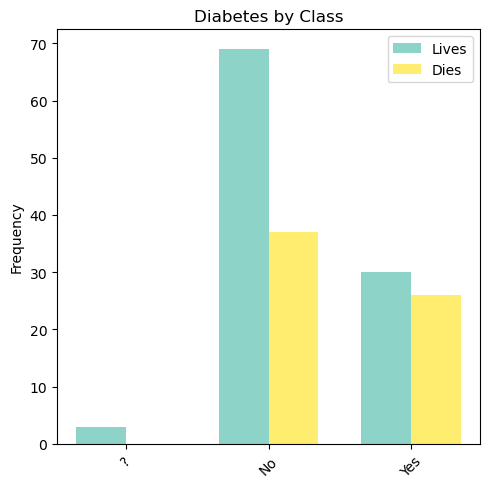

Diabetes by Class: 
Diabetes
?       0
No     37
Yes    26
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


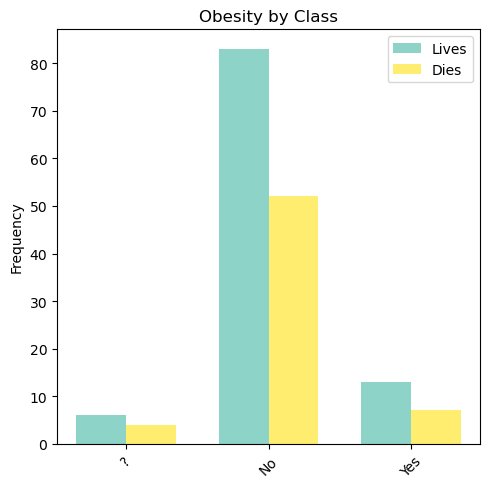

Obesity by Class: 
Obesity
?       4
No     52
Yes     7
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


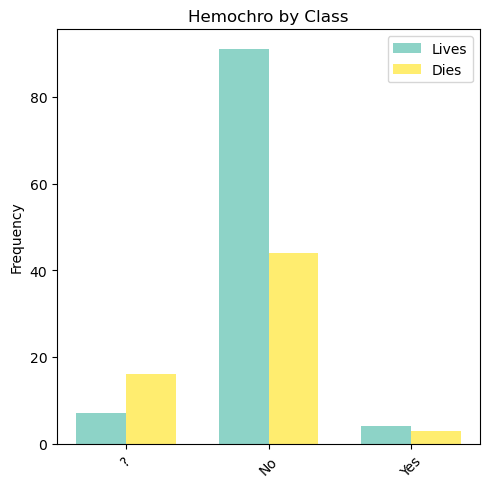

Hemochro by Class: 
Hemochro
?      16
No     44
Yes     3
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


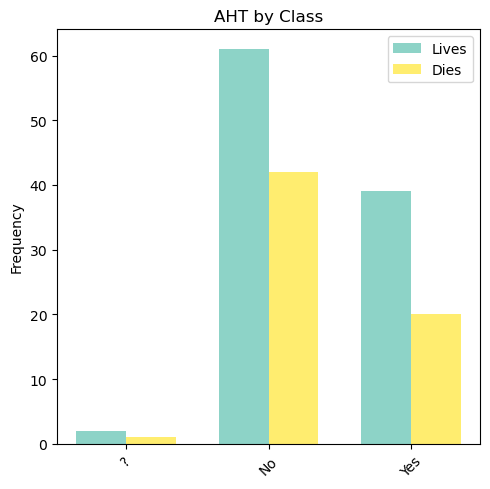

AHT by Class: 
AHT
?       1
No     42
Yes    20
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


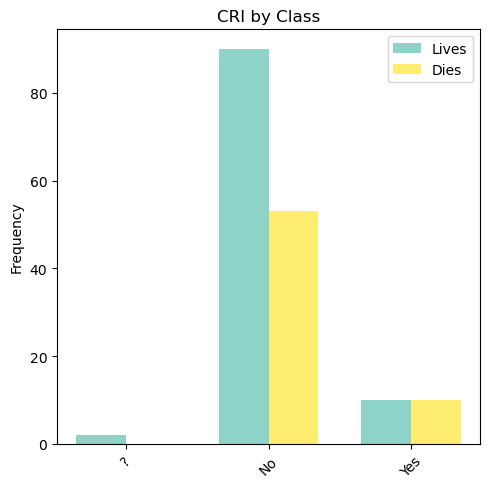

CRI by Class: 
CRI
?       0
No     53
Yes    10
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


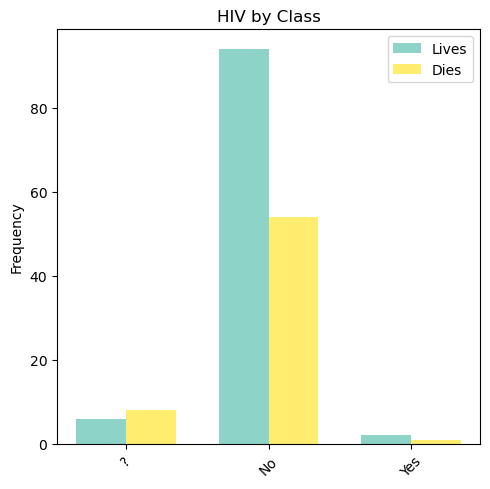

HIV by Class: 
HIV
?       8
No     54
Yes     1
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


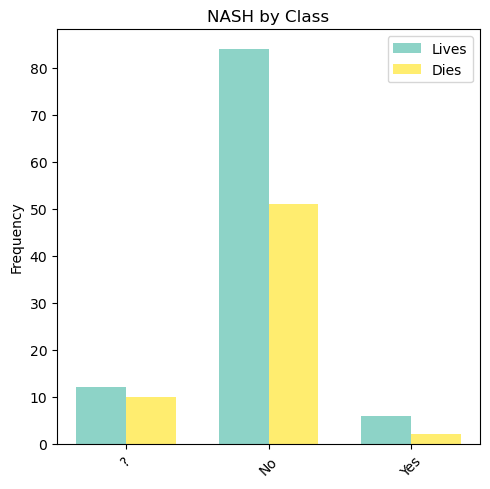

NASH by Class: 
NASH
?      10
No     51
Yes     2
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


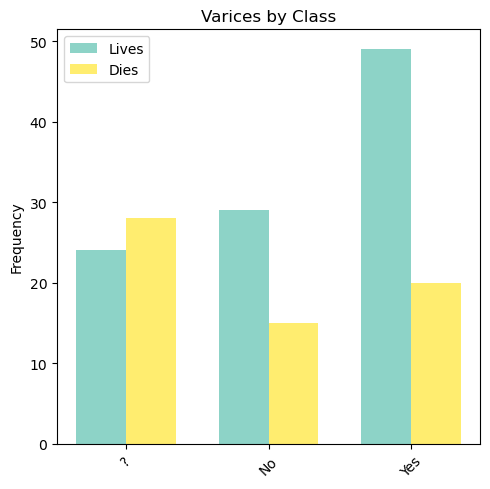

Varices by Class: 
Varices
?      28
No     15
Yes    20
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


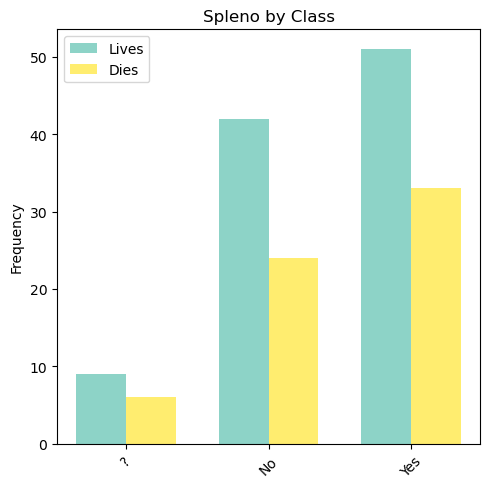

Spleno by Class: 
Spleno
?       6
No     24
Yes    33
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


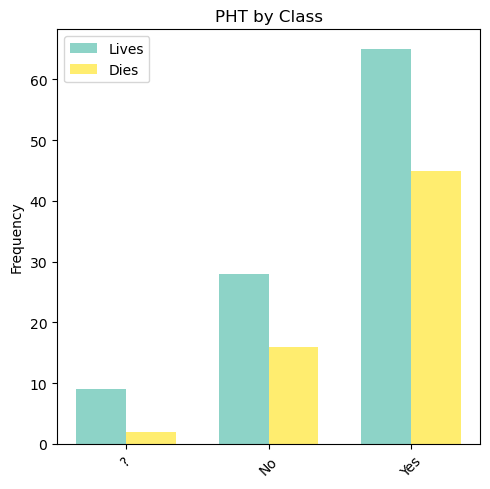

PHT by Class: 
PHT
?       2
No     16
Yes    45
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


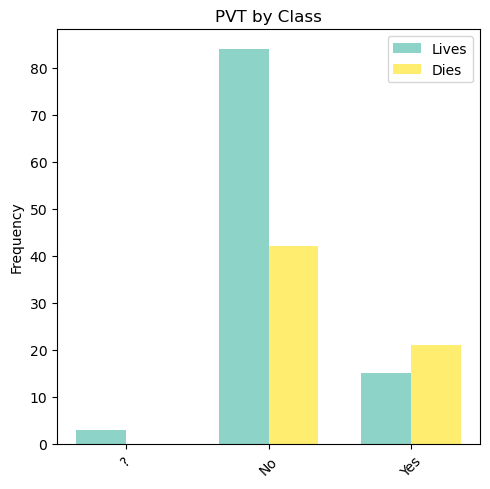

PVT by Class: 
PVT
?       0
No     42
Yes    21
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


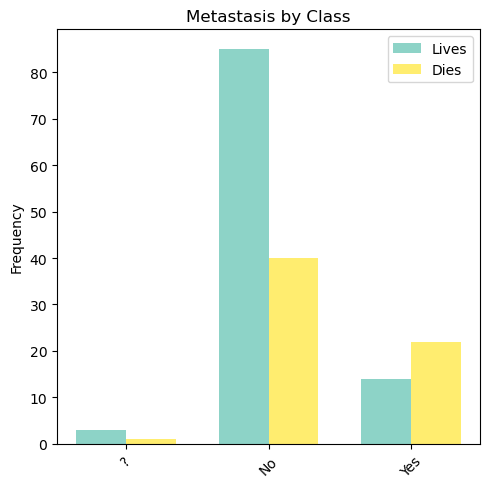

Metastasis by Class: 
Metastasis
?       1
No     40
Yes    22
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


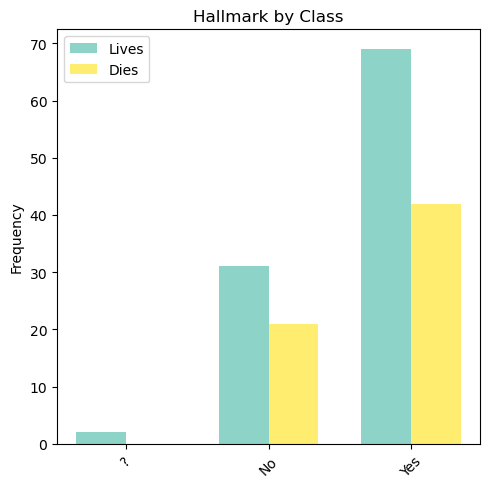

Hallmark by Class: 
Hallmark
?       0
No     21
Yes    42
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


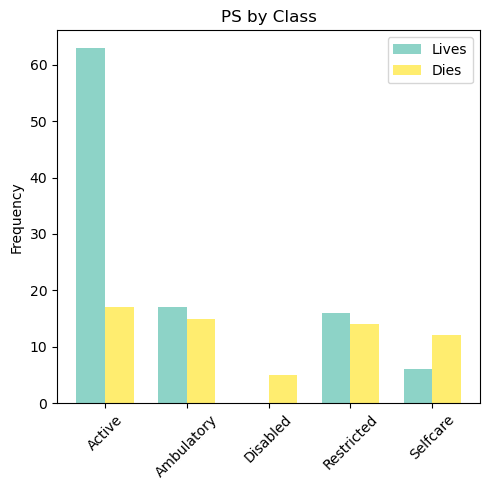

PS by Class: 
PS
Active        17
Ambulatory    15
Disabled       5
Restricted    14
Selfcare      12
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


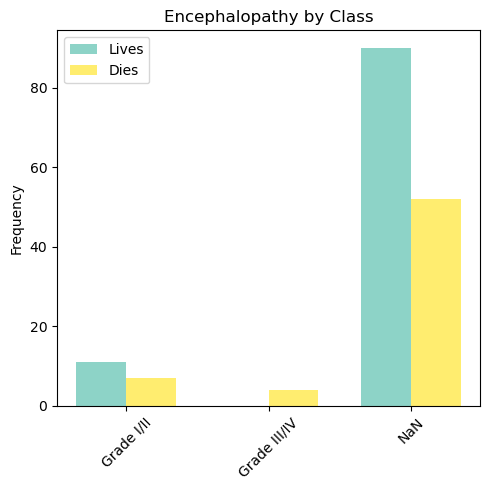

Encephalopathy by Class: 
Encephalopathy
Grade I/II       7
Grade III/IV     4
NaN             52
Name: count, dtype: int64


/tmp/ipykernel_24820/1192230204.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Set3', num_classes)


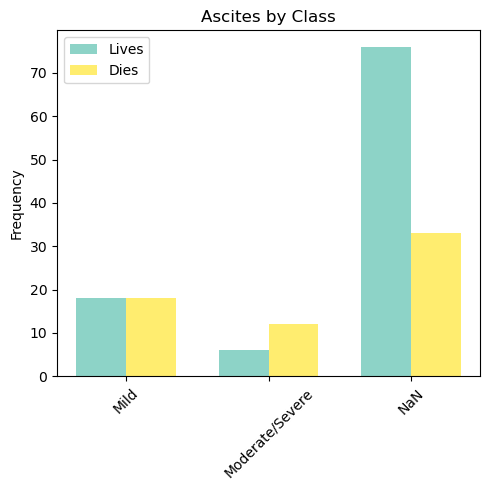

Ascites by Class: 
Ascites
Mild               18
Moderate/Severe    12
NaN                33
Name: count, dtype: int64


In [125]:

def bar_plot(variable, class_variable, color_dict=None, exclude_categories=None):
    var = df[variable].fillna('NaN').astype(str)  # Ensure all categories are treated as strings and replace NaNs with 'NaN'
    class_var = df[class_variable].astype(str)
    
    # Determine the complete set of expected categories
    unique_categories = var.unique().tolist()
    if exclude_categories:
        unique_categories = [cat for cat in unique_categories if cat not in exclude_categories]
    
    # Ensure '?' is included only if not excluded
    expected_categories = sorted(set(unique_categories + ['?']) - set(exclude_categories or []))
    
    classes = class_var.unique()  # Get unique classes
    num_classes = len(classes)
    bar_width = 0.35  # Adjust this value to control the width of each bar
    
    plt.figure(figsize=(5, 5))
    
    if color_dict and variable in color_dict:
        colors = [color_dict[variable].get(cls, (0.5, 0.5, 0.5)) for cls in classes]
    else:
        cmap = plt.cm.get_cmap('Set3', num_classes)
        colors = cmap(np.linspace(0, 1, num_classes))
    
    for i, cls in enumerate(classes):
        # Get value counts for the variable, filtered by class
        varValue = var[class_var == cls].value_counts().reindex(expected_categories, fill_value=0).sort_index()
        x_positions = np.arange(len(expected_categories)) + i * bar_width
        plt.bar(x_positions, varValue, width=bar_width, color=colors[i], label=cls)
    
    plt.xticks(np.arange(len(expected_categories)) + (num_classes - 1) * bar_width / 2, expected_categories, rotation=45)
    plt.ylabel("Frequency")
    plt.title(f"{variable} by {class_variable}")
    plt.legend()
    plt.tight_layout()
    plt.show()
    print(f"{variable} by {class_variable}: \n{varValue}")

# Assuming you have a 'Class' variable
class_variable = 'Class'

# List of variables to plot
category1 = ["Gender", "Symptoms", "Alcohol", "HBsAg", "HBeAg", "HBcAb", "HCVAb", "Cirrhosis", "Endemic", "Smoking", "Diabetes", "Obesity", "Hemochro", "AHT", "CRI", "HIV", "NASH", "Varices", "Spleno", "PHT", "PVT", "Metastasis", "Hallmark","PS","Encephalopathy","Ascites"]

for c in category1:
    if c in ["Gender", "PS", "Encephalopathy", "Ascites"]:
        bar_plot(c, class_variable, exclude_categories=['?'])
    else:
        bar_plot(c, class_variable)


Since the attributes "Ascites" and "Encephalopathy" have a high percentage of NaN values, they should be excluded from the analysis.

<h5>Numerical Attributes<h5\>

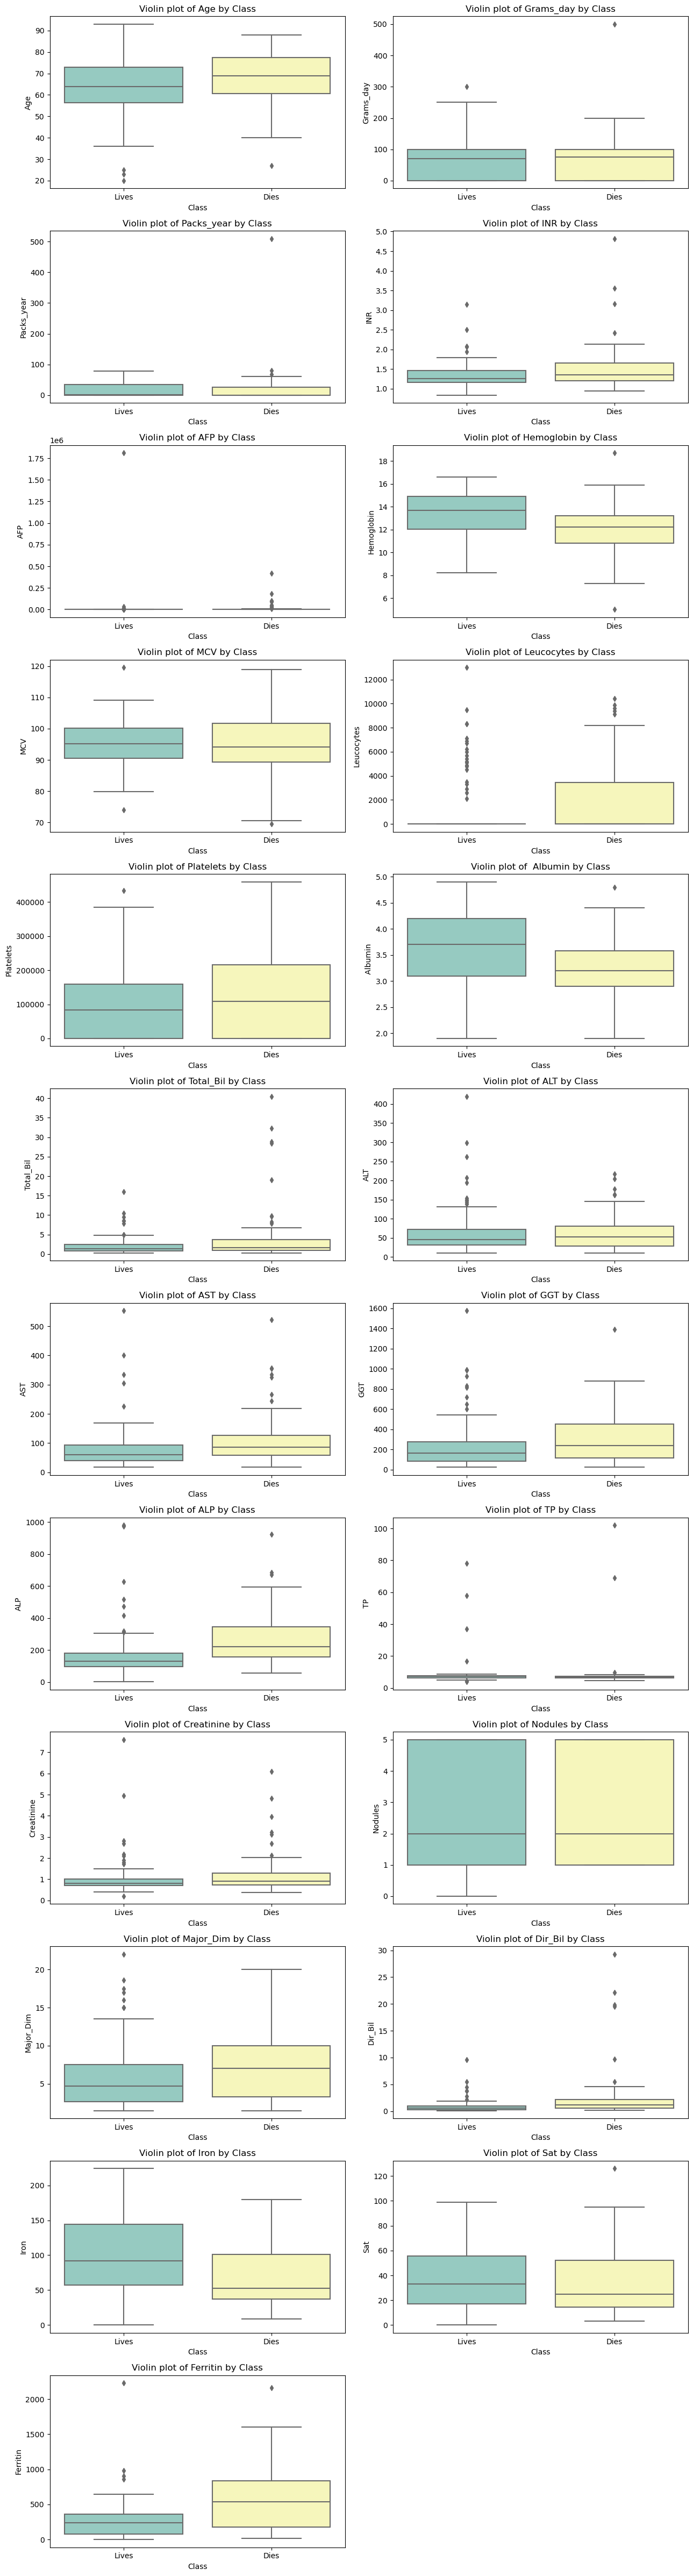

In [126]:
def create_violin_plots(df, columns, class_column, palette='Set3'):
    # Check if the class_column exists in the DataFrame
    if class_column not in df.columns:
        raise ValueError(f"The specified class column '{class_column}' is not in the DataFrame")

    num_plots = len(columns)
    num_rows = (num_plots // 2) + (num_plots % 2)
    num_cols = 2

    plt.figure(figsize=(13, num_rows * 4))  # Adjust the figure size as needed

    for index, column in enumerate(columns):
        if column not in df.columns:
            print(f"Column '{column}' is not in the DataFrame. Skipping...")
            continue
        
        # Convert the column to numeric, setting errors='coerce' will replace non-numeric values with NaN
        df[column] = pd.to_numeric(df[column], errors='coerce')
        
        plt.subplot(num_rows, num_cols, index + 1)
        sns.boxplot(x=class_column, y=column, data=df, palette=palette)
        plt.title(f'Violin plot of {column} by {class_column}')
        plt.xlabel(class_column)
        plt.ylabel(column)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

# List of numerical columns to plot
columns_to_plot = ["Age","Grams_day","Packs_year","INR","AFP","Hemoglobin","MCV","Leucocytes","Platelets"," Albumin","Total_Bil","ALT","AST","GGT","ALP","TP","Creatinine","Nodules","Major_Dim","Dir_Bil","Iron","Sat","Ferritin"]

# Ensure DataFrame df contains all columns and the class column
required_columns = columns_to_plot + ['Class']
for col in required_columns:
    if col not in df.columns:
        print(f"Warning: The column '{col}' is missing in the DataFrame")

# Create violin plots with a custom palette
create_violin_plots(df, columns_to_plot, 'Class', palette='Set3')

## Data Preprocessing <a id="Data-Preprocessing"></a>

In [127]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [128]:
df['Encephalopathy'].fillna(0, inplace=True)
df['Ascites'].fillna(0, inplace=True)
#print(df['Ascites'].head(90))
columns_to_replace = ['Symptoms','HBsAg','HBeAg','HBcAb','HCVAb','Endemic','Smoking','Diabetes','Obesity','Hemochro','AHT','CRI','HIV','NASH','Varices','Spleno','PHT','PVT','Metastasis','Hallmark','Grams_day','Packs_year','Encephalopathy','Ascites','INR','AFP','Hemoglobin','MCV','Leucocytes','Platelets',' Albumin','Total_Bil','ALT','AST','GGT','ALP','TP','Creatinine','Major_Dim','Dir_Bil','Iron','Sat','Ferritin']
for column in columns_to_replace:
    df[column].replace('?', np.nan,inplace=True)


In [129]:
df['Gender'] = df['Gender'].map({"Male":1,"Female":0})
df['Symptoms'] = df['Symptoms'].map({"Yes":1,"No":0})
df['Alcohol'] = df['Alcohol'].map({"Yes":1,"No":0})
df['HBsAg'] = df['HBsAg'].map({"Yes":1,"No":0})
df['HBeAg'] = df['HBeAg'].map({"Yes":1,"No":0})
df['HBcAb'] = df['HBcAb'].map({"Yes":1,"No":0})
df['HCVAb'] = df['HCVAb'].map({"Yes":1,"No":0})
df['Cirrhosis'] = df['Cirrhosis'].map({"Yes":1,"No":0})
df['Endemic'] = df['Endemic'].map({"Yes":1,"No":0})
df['Smoking'] = df['Smoking'].map({"Yes":1,"No":0})
df['Diabetes'] = df['Diabetes'].map({"Yes":1,"No":0})
df['Obesity'] = df['Obesity'].map({"Yes":1,"No":0})
df['Hemochro'] = df['Hemochro'].map({"Yes":1,"No":0})
df['AHT'] = df['AHT'].map({"Yes":1,"No":0})
df['CRI'] = df['CRI'].map({"Yes":1,"No":0})
df['HIV'] = df['HIV'].map({"Yes":1,"No":0})
df['NASH'] = df['NASH'].map({"Yes":1,"No":0})
df['Varices'] = df['Varices'].map({"Yes":1,"No":0})
df['Spleno'] = df['Spleno'].map({"Yes":1,"No":0})
df['PHT'] = df['PHT'].map({"Yes":1,"No":0})
df['PVT'] = df['PVT'].map({"Yes":1,"No":0})
df['Metastasis'] = df['Metastasis'].map({"Yes":1,"No":0})
df['Hallmark'] = df['Hallmark'].map({"Yes":1,"No":0})
df['PS'] = df['PS'].map({"Disabled":0,"Active":1,"Ambulatory":2,"Selfcare":3,"Restricted":4})
df.replace({"Grade I/II":1,"Grade III/IV":2}, inplace=True)
df.replace({"Mild":1,"Moderate/Severe":2}, inplace=True)
df['Class'] = df['Class'].map({"Lives":1,"Dies":0})

In [130]:
def identify_variables_to_exclude(df, missing_threshold=0.5, variance_threshold=0.0, correlation_threshold=0.9):
    reasons_to_exclude = {}

    # Handle non-numeric values and convert them to NaN
    df.replace('?', np.nan, inplace=True)

    # Ensure all columns are numeric
    df = df.apply(pd.to_numeric, errors='coerce')

    # 1. Identify variables with high missing values
    missing_series = df.isnull().mean()
    high_missing_vars = missing_series[missing_series > missing_threshold].index.tolist()
    for var in high_missing_vars:
        reasons_to_exclude[var] = "High missing values"

    # 2. Identify variables with low variance
    selector = VarianceThreshold(threshold=variance_threshold)
    selector.fit(df.fillna(0))  # Fill NaNs with 0 for variance calculation
    low_variance_vars = df.columns[~selector.get_support()].tolist()
    for var in low_variance_vars:
        reasons_to_exclude[var] = "Low variance"

    # 3. Identify highly correlated variables
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # Use built-in bool
    high_corr_vars = [column for column in upper_tri.columns if any(upper_tri[column] > correlation_threshold)]
    for var in high_corr_vars:
        if var in reasons_to_exclude:
            reasons_to_exclude[var] += " and High correlation"
        else:
            reasons_to_exclude[var] = "High correlation"

    # Print reasons for exclusion
    for var, reason in reasons_to_exclude.items():
        print(f"Variable '{var}' excluded due to: {reason}")

    # Combine all variables to exclude
    variables_to_exclude = set(reasons_to_exclude.keys())
    
    return variables_to_exclude, reasons_to_exclude

# Example DataFrame
# df = pd.read_csv('your_dataset.csv')

# Identify variables to exclude
variables_to_exclude, reasons_to_exclude = identify_variables_to_exclude(df)
print(f"Variables to exclude: {variables_to_exclude}")

# Exclude the identified variables from the DataFrame
df = df.drop(columns=variables_to_exclude)

Variable 'Dir_Bil' excluded due to: High correlation
Variables to exclude: {'Dir_Bil'}


In [131]:
# Copy original dataframe to multiple dataframes
df_1 = df.copy()
df_2 = df.copy()
df_3 = df.copy()
df_4 = df.copy()
df_5 = df.copy()
df_6 = df.copy()
df_7 = df.copy()
df_8 = df.copy()
df_9 = df.copy()
df_10 = df.copy()
df_11 = df.copy()
df_12 = df.copy()


# List of categorical features
t = ['Gender','Symptoms','Alcohol','HBsAg','HBeAg','HBcAb','HCVAb','Cirrhosis','Endemic','Smoking','Diabetes','Obesity','Hemochro','AHT','CRI','HIV','NASH','Varices','Spleno','PHT','PVT','Metastasis','Hallmark','Encephalopathy','Ascites']

# List of numerical features
l = ['Grams_day','Packs_year','PS','INR','AFP','Hemoglobin','MCV','Leucocytes','Platelets',' Albumin','Total_Bil','ALT','AST','GGT','ALP','TP','Creatinine','Nodules','Major_Dim','Iron','Sat','Ferritin']

# Helper function to convert to numeric and handle non-numeric issues
def convert_to_numeric(df, columns):
    df[columns] = df[columns].apply(pd.to_numeric, errors='coerce')

# Preprocessing for df_1
mode_values_t = df_1[t].mode().iloc[0]
df_1[t] = df_1[t].fillna(mode_values_t)
convert_to_numeric(df_1, l)
df_1[l] = df_1[l].fillna(df_1[l].mean())

# Preprocessing for df_2
mode_values_t = df_2[t].mode().iloc[0]
df_2[t] = df_2[t].fillna(mode_values_t)
convert_to_numeric(df_2, l)
mode_values_l = df_2[l].mode().iloc[0]
df_2[l] = df_2[l].fillna(mode_values_l)

# Preprocessing for df_3
mode_values_t = df_3[t].mode().iloc[0]
df_3[t] = df_3[t].fillna(mode_values_t)
convert_to_numeric(df_3, l)
df_3[l] = df_3[l].fillna(df_3[l].max())

# Preprocessing for df_4
mode_values_t = df_4[t].mode().iloc[0]
df_4[t] = df_4[t].fillna(mode_values_t)
convert_to_numeric(df_4, l)
df_4[l] = df_4[l].fillna(df_4[l].min())

# Preprocessing for df_5
df_5[t] = df_5[t].fillna(1)
convert_to_numeric(df_5, l)
df_5[l] = df_5[l].fillna(df_5[l].mean())

# Preprocessing for df_6
df_6[t] = df_6[t].fillna(1)
convert_to_numeric(df_6, l)
mode_values_l = df_6[l].mode().iloc[0]
df_6[l] = df_6[l].fillna(mode_values_l)

# Preprocessing for df_7
df_7[t] = df_7[t].fillna(1)
convert_to_numeric(df_7, l)
df_7[l] = df_7[l].fillna(df_7[l].max())

# Preprocessing for df_8
df_8[t] = df_8[t].fillna(1)
convert_to_numeric(df_8, l)
df_8[l] = df_8[l].fillna(df_8[l].min())

# Preprocessing for df_9
df_9[t] = df_9[t].fillna(0)
convert_to_numeric(df_9, l)
df_9[l] = df_9[l].fillna(df_9[l].mean())

# Preprocessing for df_10
df_10[t] = df_10[t].fillna(0)
convert_to_numeric(df_10, l)
mode_values_l = df_10[l].mode().iloc[0]
df_10[l] = df_10[l].fillna(mode_values_l)

# Preprocessing for df_11
df_11[t] = df_11[t].fillna(0)
convert_to_numeric(df_11, l)
df_11[l] = df_11[l].fillna(df_11[l].max())

# Preprocessing for df_12
df_12[t] = df_12[t].fillna(0)
convert_to_numeric(df_12, l)
df_12[l] = df_12[l].fillna(df_12[l].min())

In [132]:
df.describe(include='all')

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Iron,Sat,Ferritin,Class
count,165.000000,147.000000,165.000000,148.000000,126.000000,141.000000,156.000000,165.000000,126.000000,124.000000,162.000000,155.000000,142.000000,162.000000,163.000000,151.000000,143.000000,113.000000,150.00000,154.000000,162.000000,161.000000,163.000000,165.000000,117.000000,112.000000,165.000000,164.000000,163.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,86.000000,85.000000,85.000000,165.000000
mean,0.806061,0.639456,0.739394,0.108108,0.007937,0.269504,0.217949,0.903030,0.079365,0.508065,0.345679,0.129032,0.049296,0.364198,0.122699,0.019868,0.055944,0.610619,0.56000,0.714286,0.222222,0.223602,0.680982,64.690909,71.008547,20.464286,1.927273,0.158537,0.441718,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,85.598837,37.028941,438.997647,0.618182
std,0.396586,0.481800,0.440302,0.311571,0.089087,0.445284,0.414182,0.296817,0.271387,0.501963,0.477064,0.336322,0.217251,0.482697,0.329103,0.140009,0.230621,0.489782,0.49805,0.453228,0.417029,0.417959,0.467533,13.319534,76.277680,51.565130,1.202455,0.428137,0.685819,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,55.698995,28.993552,457.114454,0.487311
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,40.500000,16.000000,84.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,66.000000,75.000000,0.000000,1.000000,0.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,83.000000,27.000000,295.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,74.000000,100.000000,30.500000,3.000000,0.000000,1.000000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,2.925000,78.000000,110.250000,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,118.000000,56.000000,706.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,93.000000,500.000000,510.000000,4.000000,2.000000,2.000000,4.820000,1.810346e+06,18.700000,119.600000,1300

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    int64  
 1   Symptoms        147 non-null    float64
 2   Alcohol         165 non-null    int64  
 3   HBsAg           148 non-null    float64
 4   HBeAg           126 non-null    float64
 5   HBcAb           141 non-null    float64
 6   HCVAb           156 non-null    float64
 7   Cirrhosis       165 non-null    int64  
 8   Endemic         126 non-null    float64
 9   Smoking         124 non-null    float64
 10  Diabetes        162 non-null    float64
 11  Obesity         155 non-null    float64
 12  Hemochro        142 non-null    float64
 13  AHT             162 non-null    float64
 14  CRI             163 non-null    float64
 15  HIV             151 non-null    float64
 16  NASH            143 non-null    float64
 17  Varices         113 non-null    flo


## Data Modeling (Supervised Learning) <a id="Data-Modeling-Supervised-Learning"></a>

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

The supervised learning algorithms that are being use are  decision trees, KNN, random forest, support vector machine, .ulti-layer perceptron neural network with dropout.

<h2>Comparing models based on accuracy alternating in the exchange of NaN values by mean, mode, maximum value and minimum value.<h2\>

The accuracy from all these different datasets will be obtained from the 5 different supervised learning algorithms.
Using the maximum value and the mode in all the NaN values provides in mean the most accurate results.


In [135]:
# Define the features and target
features = ["Gender", "Symptoms", "Alcohol", "HBsAg", "HBeAg", "HBcAb", "HCVAb", "Cirrhosis", "Endemic", "Smoking", "Diabetes", "Obesity", "Hemochro", "AHT", "CRI", "HIV", "NASH", "Varices", "Spleno", "PHT", "PVT", "Metastasis", "Hallmark", "Age", "Grams_day", "Packs_year", "PS", "Encephalopathy", "Ascites", "INR", "AFP", "Hemoglobin", "MCV", "Leucocytes", "Platelets", " Albumin", "Total_Bil", "ALT", "AST", "GGT", "ALP", "TP", "Creatinine", "Nodules", "Major_Dim", "Iron", "Sat", "Ferritin"]
target = "Class"


<h3>Mode and mean<h3\>

<h5>Decision Trees<h5\>

In [136]:
# Separate the features and target variable
X = df_1[features]
y = df_1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.64


In [137]:
from sklearn.neighbors import KNeighborsClassifier

<h5>KNN<h5\>

In [138]:
X = df_1[features]
y = df_1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.62


In [139]:
from sklearn.ensemble import RandomForestClassifier

<h5>Random forest<h5\>

In [140]:
X = df_1[features]
y = df_1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78


In [141]:
from sklearn.svm import SVC

<h5>Support Vector Machine<h5\>

In [142]:
X = df_1[features]
y = df_1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


In [143]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<h5>Multi-layer perceptron neural network with dropout<h5\>

In [144]:
X = df_1[features]
y = df_1[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Mode and mode<h3\>

<h5>Decision Trees<h5\>

In [145]:
X = df_2[features]
y = df_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.68


<h5>KNN<h5\>

In [146]:
X = df_2[features]
y = df_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>Random forest<h5\>

In [147]:
X = df_2[features]
y = df_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


<h5>Support Vector Machine<h5\>

In [148]:
X = df_2[features]
y = df_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [149]:
X = df_2[features]
y = df_2[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Mode and maximum<h3\>

<h5>Decision Trees<h5\>

In [150]:
# Separate the features and target variable
X = df_3[features]
y = df_3[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.66


<h5>KNN<h5\>

In [151]:
X = df_3[features]
y = df_3[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Random forest<h5\>

In [152]:
X = df_3[features]
y = df_3[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


<h5>Support Vector Machine<h5\>

In [153]:
X = df_3[features]
y = df_3[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [154]:
X = df_3[features]
y = df_3[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Mode and minimum<h3\>

<h5>Decision Trees<h5\>

In [155]:
# Separate the features and target variable
X = df_4[features]
y = df_4[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.64


<h5>KNN<h5\>

In [156]:
X = df_4[features]
y = df_4[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>Random forest<h5\>

In [157]:
X = df_4[features]
y = df_4[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


<h5>Support Vector Machine<h5\>

In [158]:
X = df_4[features]
y = df_4[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [159]:
X = df_4[features]
y = df_4[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


<h3>Maximum and mean<h3\>

<h5>Decision Trees<h5\>

In [160]:
# Separate the features and target variable
X = df_5[features]
y = df_5[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


<h5>KNN<h5\>

In [161]:
X = df_5[features]
y = df_5[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h5>Random forest<h5\>

In [162]:
X = df_5[features]
y = df_5[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


<h5>Support Vector Machine<h5\>

In [163]:
X = df_5[features]
y = df_5[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [164]:
X = df_5[features]
y = df_5[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Maximum and mode<h3\>

<h5>Decision Trees<h5\>

In [165]:
# Separate the features and target variable
X = df_6[features]
y = df_6[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


<h5>KNN<h5\>

In [166]:
X = df_6[features]
y = df_6[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>Random forest<h5\>

In [167]:
X = df_6[features]
y = df_6[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


<h5>Support Vector Machine<h5\>

In [168]:
X = df_6[features]
y = df_6[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [169]:
X = df_6[features]
y = df_6[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Maximum and maximum<h3\>

<h5>Decision Trees<h5\>

In [170]:
# Separate the features and target variable
X = df_7[features]
y = df_7[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>KNN<h5\>

In [171]:
X = df_7[features]
y = df_7[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Random forest<h5\>

In [172]:
X = df_7[features]
y = df_7[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.68


<h5>Support Vector Machine<h5\>

In [173]:
X = df_7[features]
y = df_7[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [174]:
X = df_7[features]
y = df_7[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Maximum and minimum<h3\>

<h5>Decision Trees<h5\>

In [175]:
# Separate the features and target variable
X = df_8[features]
y = df_8[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>KNN<h5\>

In [176]:
X = df_8[features]
y = df_8[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>Random forest<h5\>

In [177]:
X = df_8[features]
y = df_8[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


<h5>Support Vector Machine<h5\>

In [178]:
X = df_8[features]
y = df_8[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [179]:
X = df_8[features]
y = df_8[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


<h3>Minimum and mean<h3\>

<h5>Decision Trees<h5\>

In [180]:
# Separate the features and target variable
X = df_9[features]
y = df_9[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>KNN<h5\>

In [181]:
X = df_9[features]
y = df_9[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h5>Random forest<h5\>

In [182]:
X = df_9[features]
y = df_9[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


<h5>Support Vector Machine<h5\>

In [183]:
X = df_9[features]
y = df_9[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [184]:
X = df_9[features]
y = df_9[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Minimum and mode<h3\>

<h5>Decision Trees<h5\>

In [185]:
# Separate the features and target variable
X = df_10[features]
y = df_10[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


<h5>KNN<h5\>

In [186]:
X = df_10[features]
y = df_10[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the valX = df_9[features]
y = df_9[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>Random forest<h5\>

In [187]:
X = df_10[features]
y = df_10[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.74


<h5>Support Vector Machine<h5\>

In [188]:
X = df_10[features]
y = df_10[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [189]:
X = df_10[features]
y = df_10[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Minimum and maximum<h3\>

<h5>Decision Trees<h5\>

In [190]:
# Separate the features and target variable
X = df_11[features]
y = df_11[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.70


<h5>KNN<h5\>

In [191]:
X = df_11[features]
y = df_11[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Random forest<h5\>

In [192]:
X = df_11[features]
y = df_11[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


<h5>Support Vector Machine<h5\>

In [193]:
X = df_11[features]
y = df_11[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.56


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [194]:
X = df_11[features]
y = df_11[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


<h3>Minimum and minimum<h3\>

<h5>Decision Trees<h5\>

In [195]:
# Separate the features and target variable
X = df_12[features]
y = df_12[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = decision_tree_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>KNN<h5\>

In [196]:
X = df_12[features]
y = df_12[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define the value of k
k = 3

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the classifier on the training set
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.66


<h5>Random forest<h5\>

In [197]:
X = df_12[features]
y = df_12[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the Random Forest classifier
random_forest_classifier = RandomForestClassifier(random_state=0)

# Train the classifier on the training set
random_forest_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = random_forest_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.76


<h5>Support Vector Machine<h5\>

In [198]:
X = df_12[features]
y = df_12[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the classifier
svm_classifier = SVC(random_state=0)

# Train the classifier on the training set
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.58


<h5>Multi-layer perceptron neural network with dropout<h5\>

In [199]:
X = df_12[features]
y = df_12[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                               learning_rate='adaptive', max_iter=200, random_state=0)

# Train the classifier on the training set
mlp_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = mlp_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.60


<h2>The most accurate data set<h2\>

<img src="grafi.png" />

Using the maximum value and the mode in all the NaN values provides in mean the most accurate results.

## Data Evaluation <a id="Data-Evaluation"></a>

In [200]:
df=df_6.copy()

<h2>Base case<h2\>

In [201]:
# Define the features and target
features = ["Gender", "Symptoms", "Alcohol", "HBsAg", "HBeAg", "HBcAb", "HCVAb", "Cirrhosis", "Endemic", "Smoking", "Diabetes", "Obesity", "Hemochro", "AHT", "CRI", "HIV", "NASH", "Varices", "Spleno", "PHT", "PVT", "Metastasis", "Hallmark", "Age", "Grams_day", "Packs_year", "PS", "Encephalopathy", "Ascites", "INR", "AFP", "Hemoglobin", "MCV", "Leucocytes", "Platelets", " Albumin", "Total_Bil", "ALT", "AST", "GGT", "ALP", "TP", "Creatinine", "Nodules", "Major_Dim", "Iron", "Sat", "Ferritin"]
target = 'Class'

In [202]:

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [203]:
# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

In [204]:
# Function to evaluate the model and print metrics
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    return conf_matrix


# Evaluate each model and print metrics
conf_matrices = {}
for model_name, model in models.items():
    conf_matrix = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    conf_matrices[model_name] = conf_matrix

Model: Decision Tree
Accuracy: 0.74
Confusion Matrix:
[[12  9]
 [ 4 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.57      0.65        21
           1       0.74      0.86      0.79        29

    accuracy                           0.74        50
   macro avg       0.74      0.72      0.72        50
weighted avg       0.74      0.74      0.73        50

Model: K-Nearest Neighbors
Accuracy: 0.66
Confusion Matrix:
[[ 7 14]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.33      0.45        21
           1       0.65      0.90      0.75        29

    accuracy                           0.66        50
   macro avg       0.68      0.61      0.60        50
weighted avg       0.67      0.66      0.63        50

Model: Random Forest
Accuracy: 0.74
Confusion Matrix:
[[11 10]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   suppor

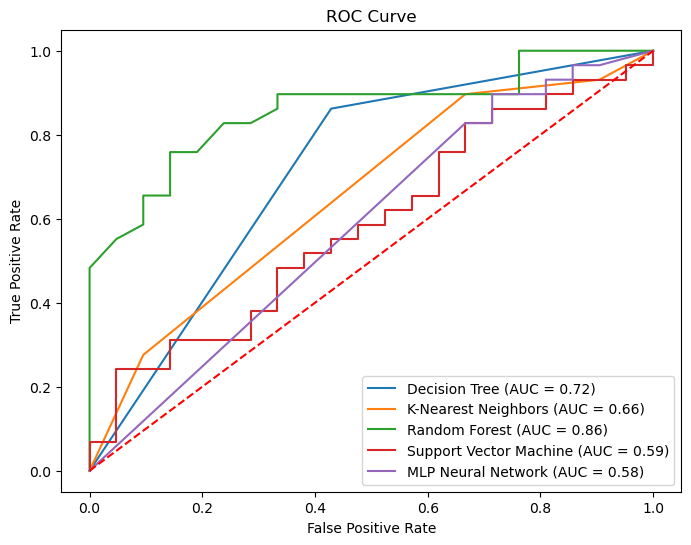

In [205]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    except AttributeError:
        y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.legend()
plt.show()

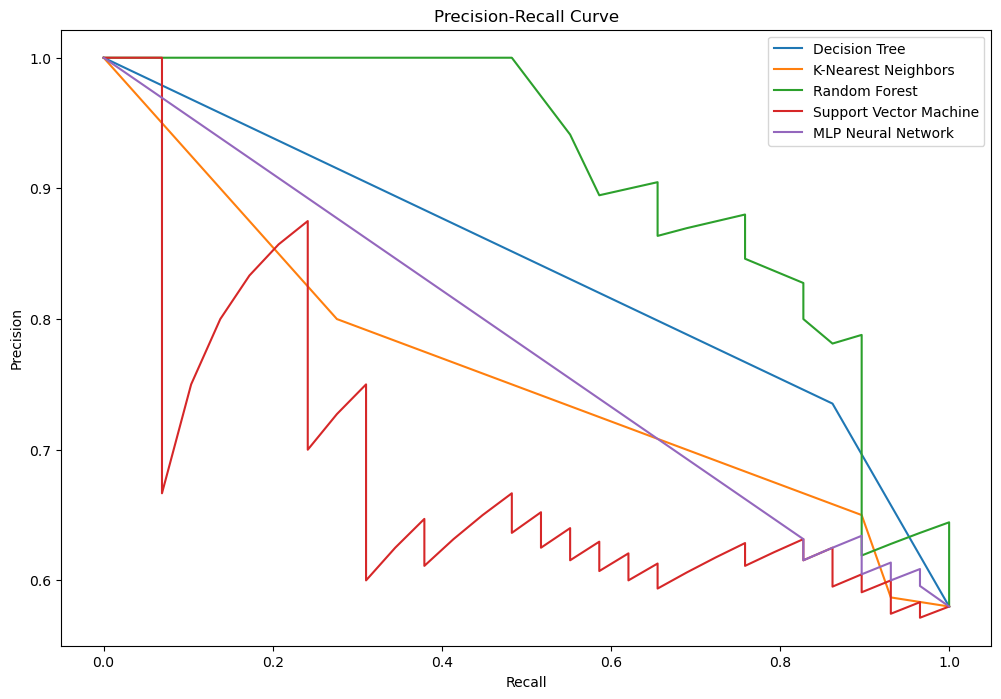

In [206]:
from sklearn.metrics import precision_recall_curve

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, label=f'{model_name}')

# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(probability=True, random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Plot Precision-Recall curves for each model
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



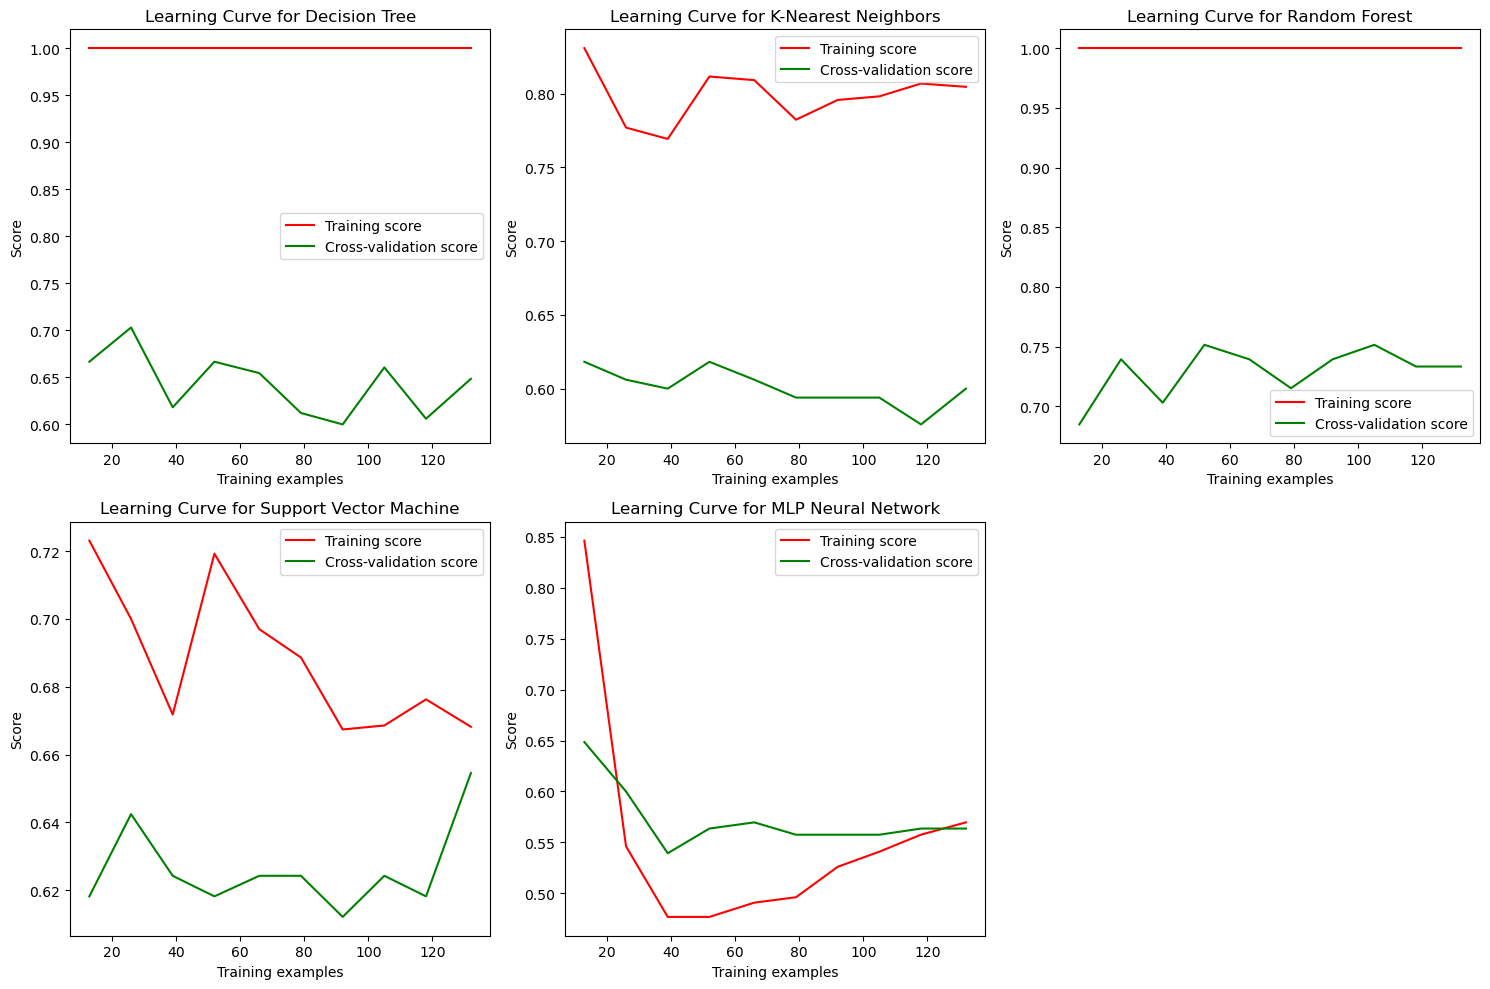

In [207]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    ax.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.set_title(f'Learning Curve for {model_name}')
    ax.legend(loc='best')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Apply learning curve to all algorithms and plot in the grid
for (model_name, model), ax in zip(models.items(), axes.flatten()[:len(models)]):
    plot_learning_curve(model, X, y, model_name, ax)

# Remove the empty subplot
if len(models) < 6:
    for ax in axes.flatten()[len(models):]:
        fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

/home/danny/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


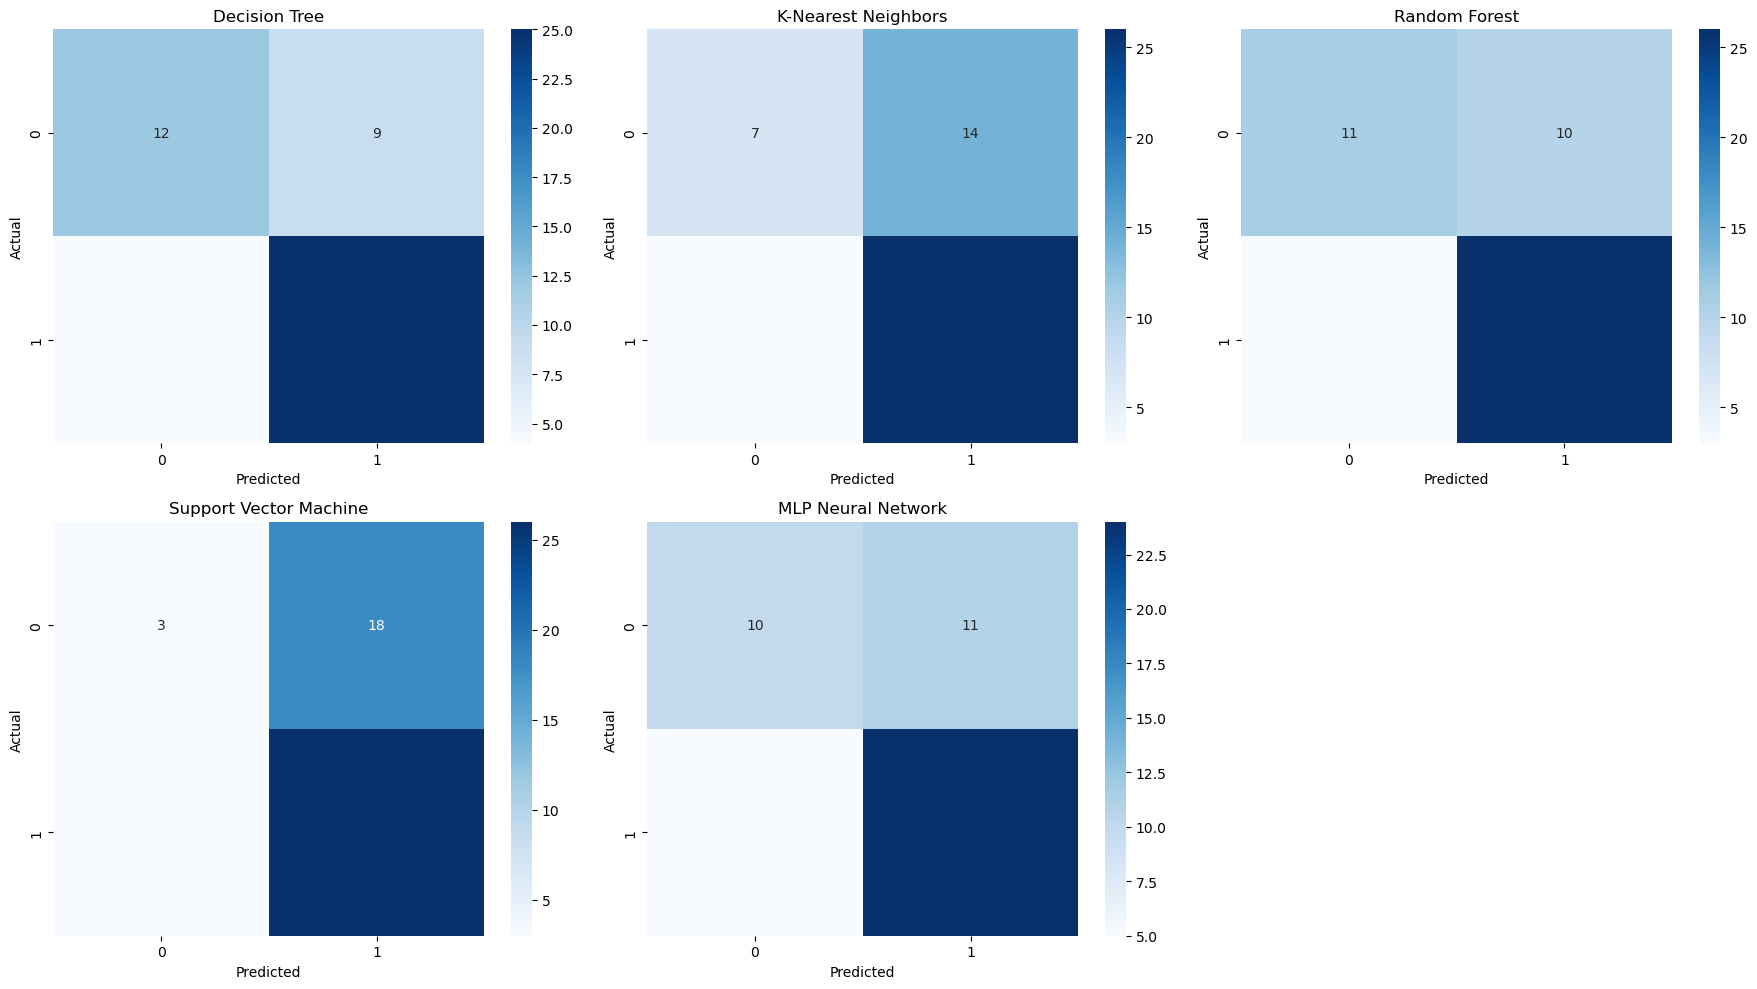

In [208]:
# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(ax, conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_name}')

# Train the models and store confusion matrices
conf_matrices = {}
for model_name, model in models.items():
    if model_name == "MLP Neural Network":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[model_name] = conf_matrix

# Plot the confusion matrices in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each confusion matrix
for ax, (model_name, conf_matrix) in zip(axes, conf_matrices.items()):
    plot_confusion_matrix(ax, conf_matrix, model_name)

# Remove any unused subplots
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [209]:
from sklearn.inspection import permutation_importance
from IPython.display import display

# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to get feature importance
def get_feature_importance(model, model_name, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        return pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
    else:
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)
        return pd.Series(result.importances_mean, index=features).sort_values(ascending=False)

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(probability=True, random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                                        alpha=0.0001, learning_rate='adaptive', max_iter=200, random_state=0)
}

# DataFrame to store feature importances
feature_importances_df = pd.DataFrame()

# Compute feature importances for each model
for model_name, model in models.items():
    if model_name == "MLP Neural Network":
        feature_importances_df[model_name] = get_feature_importance(model, model_name, X_train_scaled, y_train, X_test_scaled, y_test)
    else:
        feature_importances_df[model_name] = get_feature_importance(model, model_name, X_train, y_train, X_test, y_test)

# Display the feature importances table
display(feature_importances_df)


/home/danny/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Decision Tree,K-Nearest Neighbors,Random Forest,Support Vector Machine,MLP Neural Network
AFP,0.244900,0.044,0.076202,0.018,-2.000000e-02
Leucocytes,0.111458,-0.008,0.047101,0.000,-8.000000e-03
Iron,0.097412,0.000,0.042955,0.000,-2.600000e-02
Total_Bil,0.078683,0.000,0.038311,0.000,0.000000e+00
MCV,0.072803,0.000,0.040890,0.000,-2.200000e-02
Ferritin,0.067961,0.002,0.053006,0.000,8.000000e-03
INR,0.053358,0.000,0.034471,0.000,-1.000000e-02
ALT,0.045494,0.000,0.025243,0.000,0.000000e+00
Albumin,0.036675,0.000,0.040281,0.000,2.000000e-03
TP,0.035080,0.000,0.032500,0.000,-2.000000e-03


<h2>TESTE 1<h2\>

Usar apenas as 10 variáveis com melhor feature value.

In [211]:
features = ['AFP','Leucocytes','Age','Metastasis','INR','Ferritin','PS','HBcAb','Nodules','MCV']
target = "Class"
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [212]:
# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

In [213]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    return conf_matrix


# Evaluate each model and print metrics
conf_matrices = {}
for model_name, model in models.items():
    conf_matrix = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    conf_matrices[model_name] = conf_matrix

Model: Decision Tree
Accuracy: 0.62
Confusion Matrix:
[[12  9]
 [10 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        21
           1       0.68      0.66      0.67        29

    accuracy                           0.62        50
   macro avg       0.61      0.61      0.61        50
weighted avg       0.62      0.62      0.62        50

Model: K-Nearest Neighbors
Accuracy: 0.70
Confusion Matrix:
[[14  7]
 [ 8 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.67      0.65        21
           1       0.75      0.72      0.74        29

    accuracy                           0.70        50
   macro avg       0.69      0.70      0.69        50
weighted avg       0.70      0.70      0.70        50

Model: Random Forest
Accuracy: 0.78
Confusion Matrix:
[[13  8]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   suppor

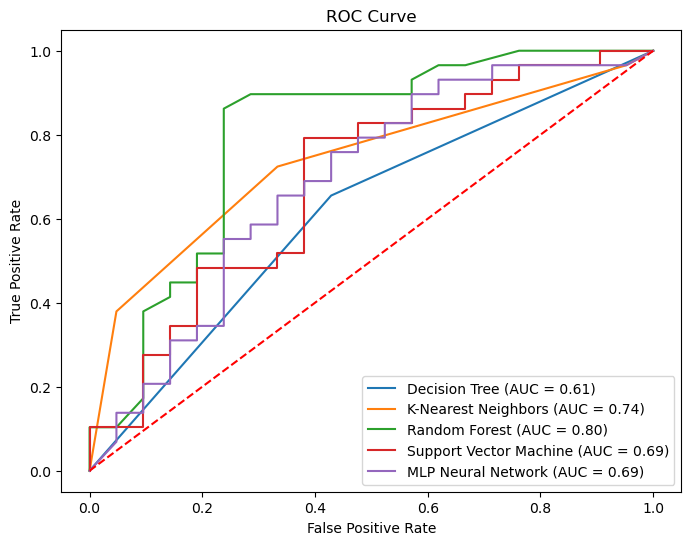

In [214]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    except AttributeError:
        y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.legend()
plt.show()

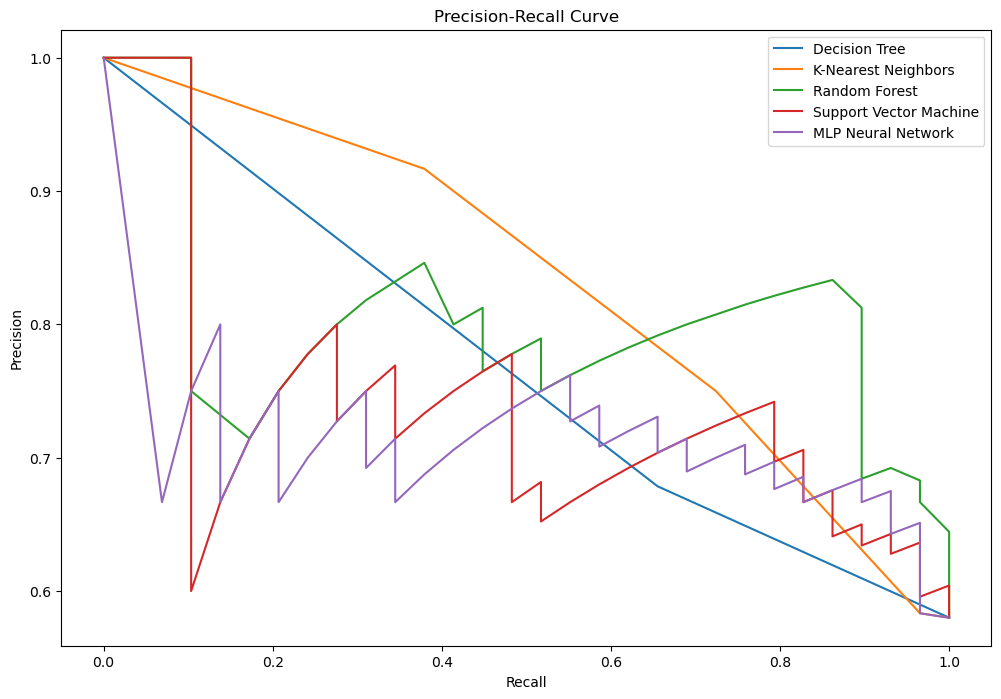

In [215]:
from sklearn.metrics import precision_recall_curve

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, label=f'{model_name}')

# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(probability=True, random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Plot Precision-Recall curves for each model
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


/home/danny/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


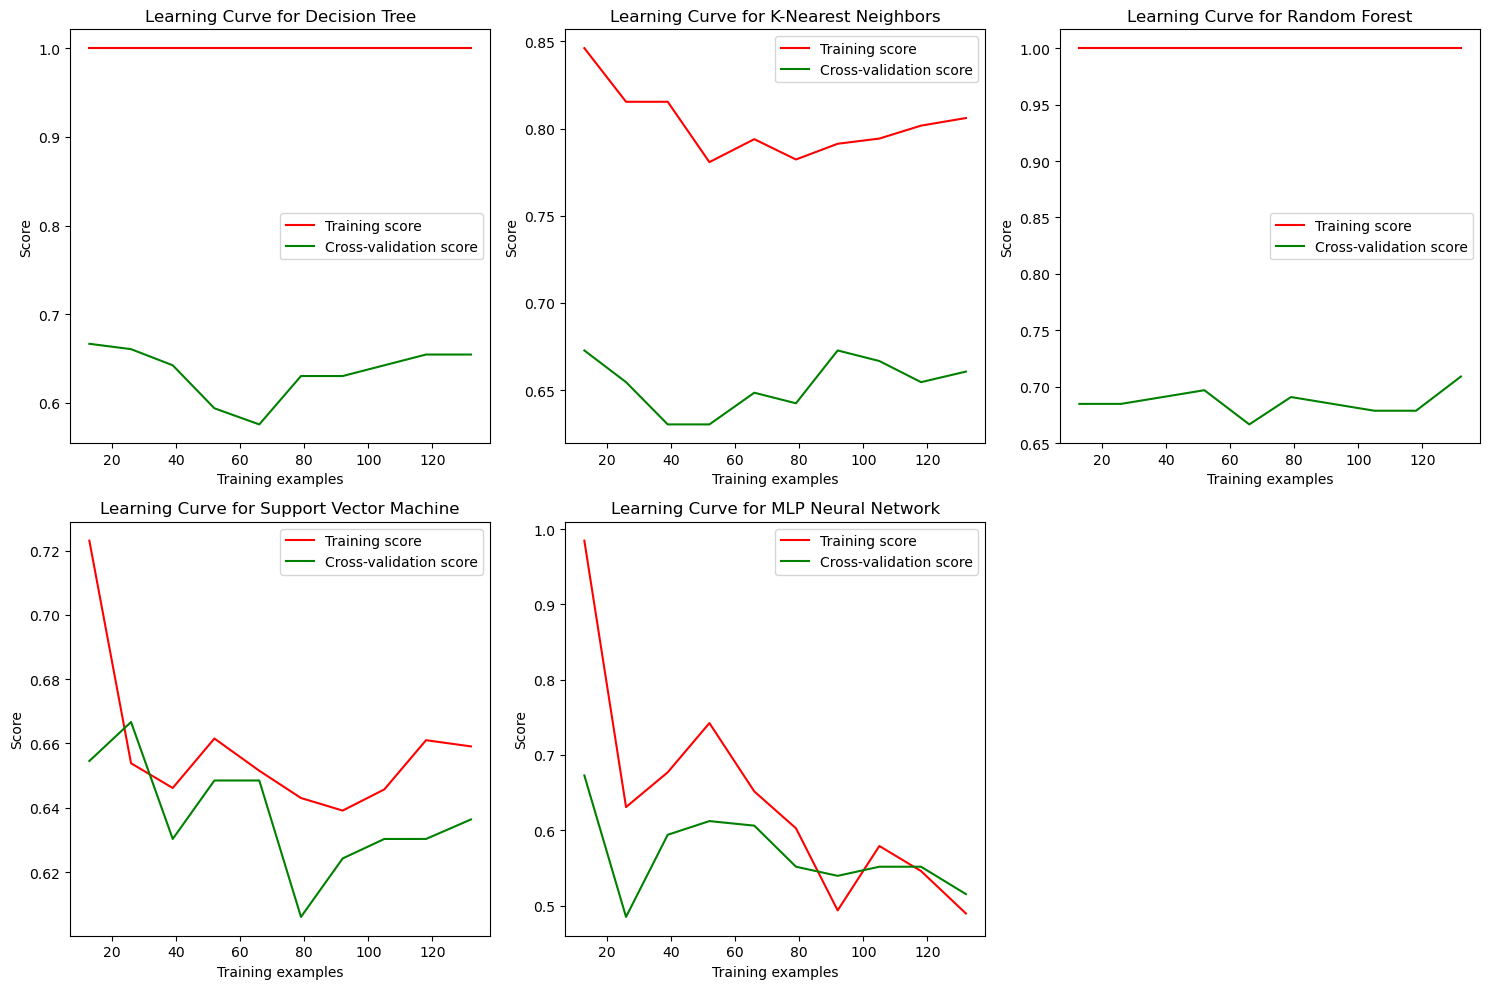

In [216]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    ax.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.set_title(f'Learning Curve for {model_name}')
    ax.legend(loc='best')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Apply learning curve to all algorithms and plot in the grid
for (model_name, model), ax in zip(models.items(), axes.flatten()[:len(models)]):
    plot_learning_curve(model, X, y, model_name, ax)

# Remove the empty subplot
if len(models) < 6:
    for ax in axes.flatten()[len(models):]:
        fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

/home/danny/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


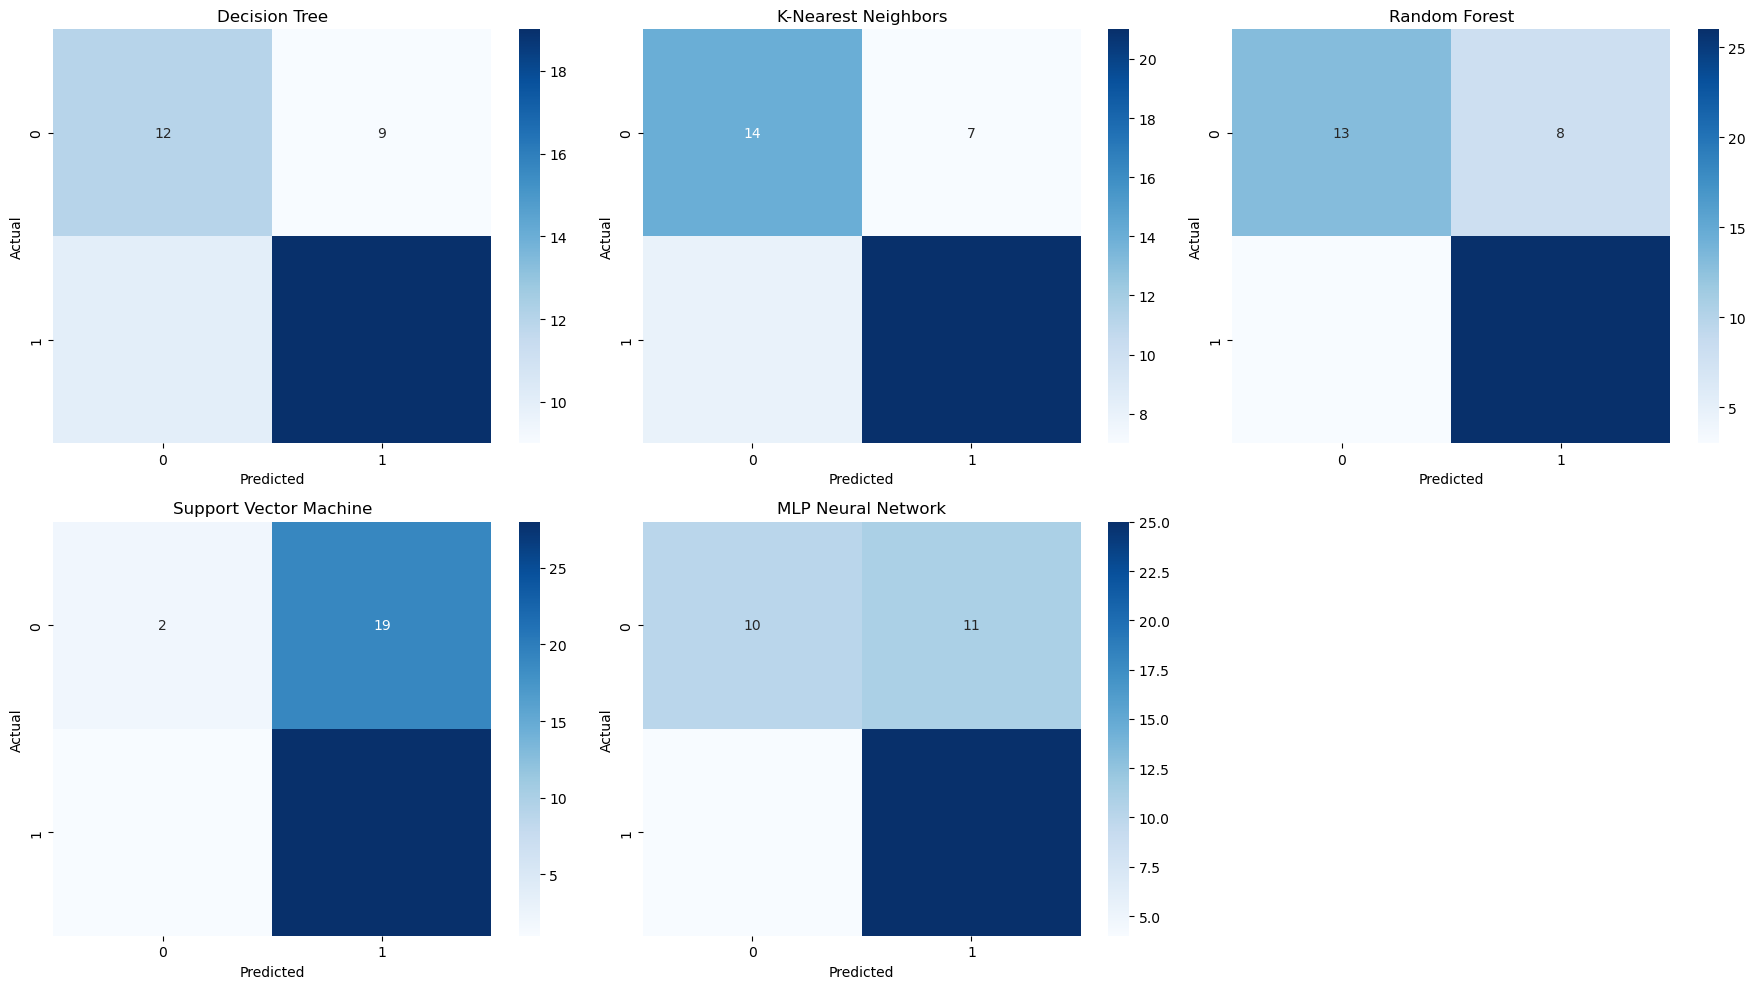

In [217]:
# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(ax, conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_name}')

# Train the models and store confusion matrices
conf_matrices = {}
for model_name, model in models.items():
    if model_name == "MLP Neural Network":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[model_name] = conf_matrix

# Plot the confusion matrices in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each confusion matrix
for ax, (model_name, conf_matrix) in zip(axes, conf_matrices.items()):
    plot_confusion_matrix(ax, conf_matrix, model_name)

# Remove any unused subplots
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


<h2>TESTE 2<h2\>

Usar todas as variáveis e4xceto as 10 com pior feature value.

In [218]:
features = ["AFP", "Leucocytes", "Age", "Metastasis", "INR", "Ferritin", "PS", "HBcAb", "Nodules", "MCV", "TP", "Total_Bil", "ALT", "GGT", "Hemoglobin", "Alcohol", "Platelets", " Albumin", "AST", "HBeAg", "ALP", "Creatinine", "Major_Dim", "Iron", "Sat", "HBsAg", "HCVAb", "Cirrhosis", "HIV", "Endemic", "Smoking", "Diabetes", "Obesity", "Hemochro", "AHT", "CRI", "NASH"]
target = "Class"
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [219]:
# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

In [220]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    return conf_matrix


# Evaluate each model and print metrics
conf_matrices = {}
for model_name, model in models.items():
    conf_matrix = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    conf_matrices[model_name] = conf_matrix

Model: Decision Tree
Accuracy: 0.70
Confusion Matrix:
[[12  9]
 [ 6 23]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.57      0.62        21
           1       0.72      0.79      0.75        29

    accuracy                           0.70        50
   macro avg       0.69      0.68      0.68        50
weighted avg       0.70      0.70      0.70        50

Model: K-Nearest Neighbors
Accuracy: 0.64
Confusion Matrix:
[[ 6 15]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        21
           1       0.63      0.90      0.74        29

    accuracy                           0.64        50
   macro avg       0.65      0.59      0.57        50
weighted avg       0.65      0.64      0.60        50

Model: Random Forest
Accuracy: 0.74
Confusion Matrix:
[[11 10]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   suppor

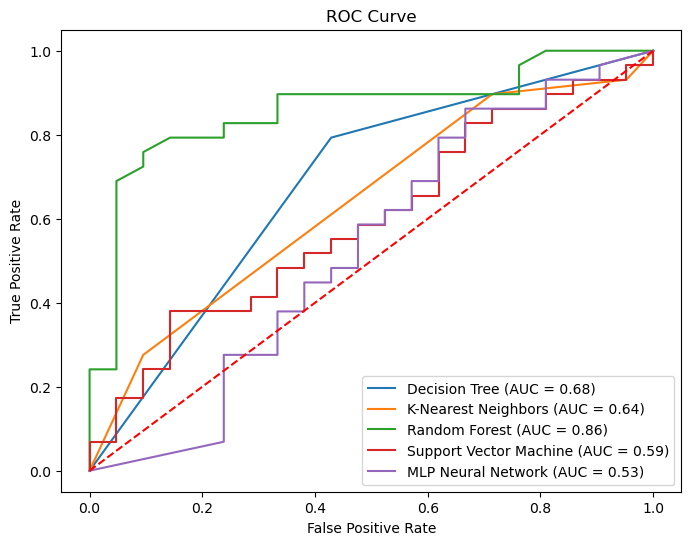

In [221]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    except AttributeError:
        y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.legend()
plt.show()

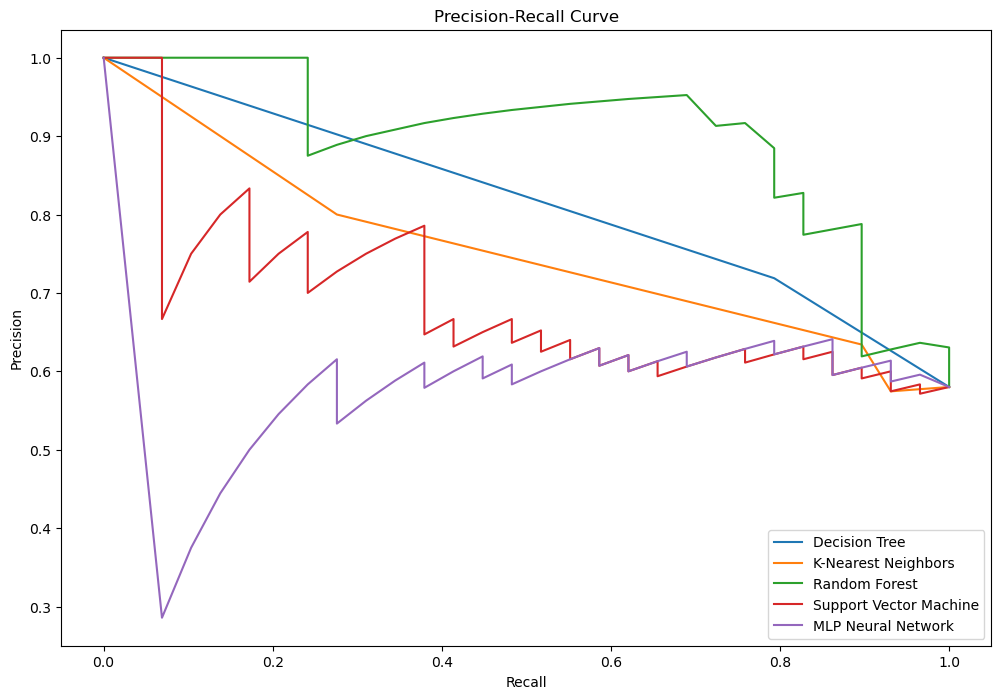

In [222]:
from sklearn.metrics import precision_recall_curve

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, label=f'{model_name}')

# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(probability=True, random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Plot Precision-Recall curves for each model
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

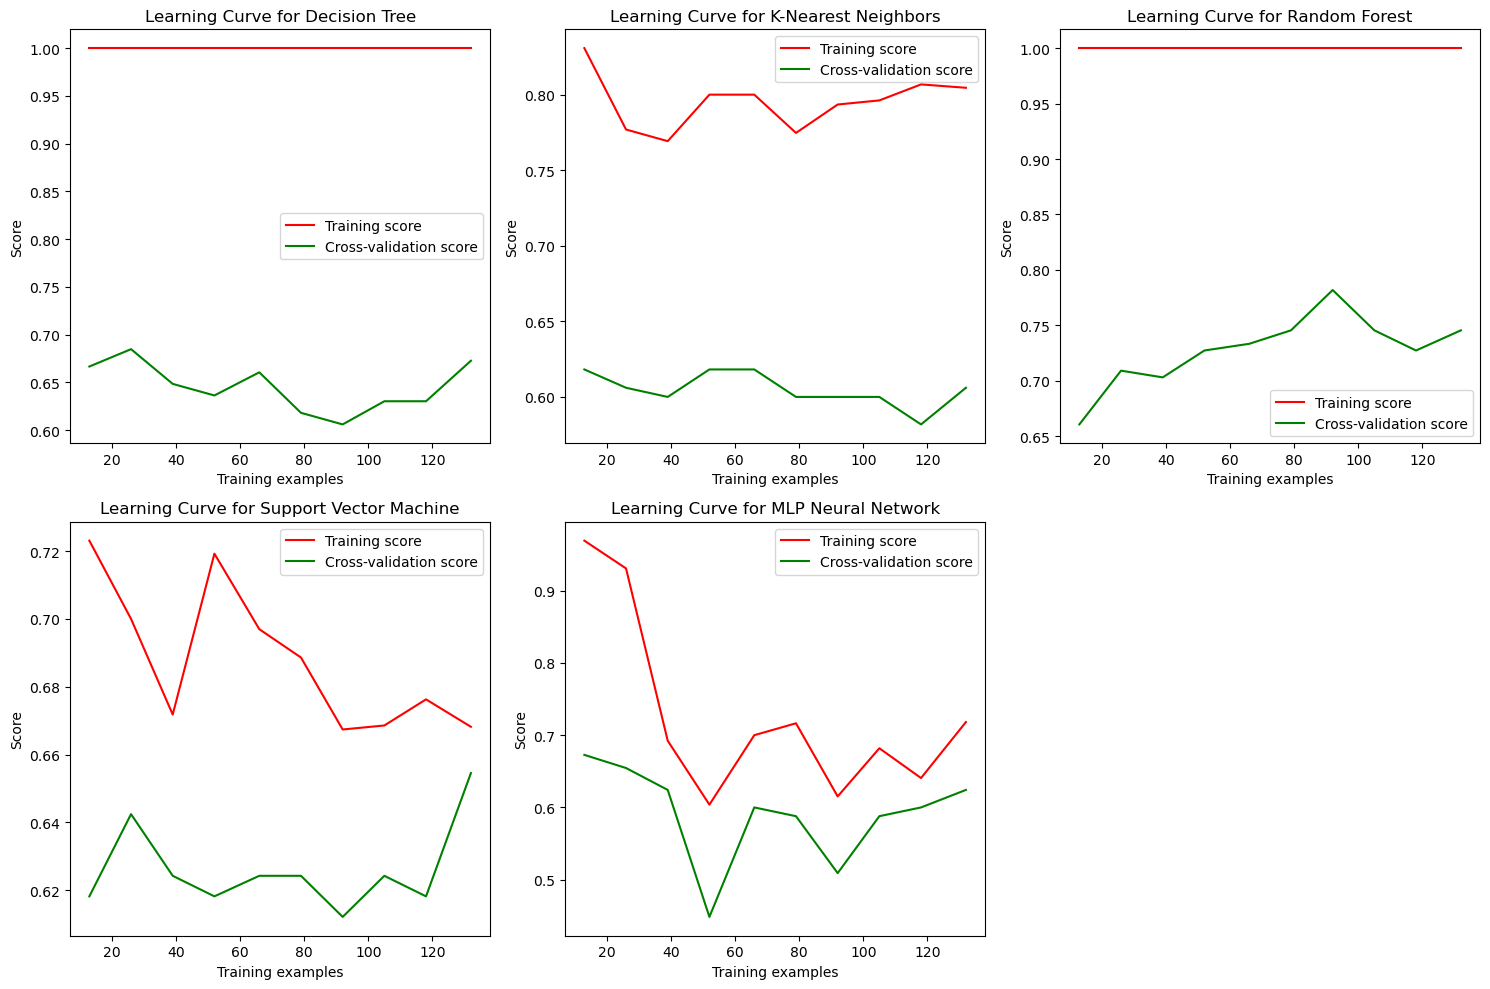

In [223]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    ax.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.set_title(f'Learning Curve for {model_name}')
    ax.legend(loc='best')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Apply learning curve to all algorithms and plot in the grid
for (model_name, model), ax in zip(models.items(), axes.flatten()[:len(models)]):
    plot_learning_curve(model, X, y, model_name, ax)

# Remove the empty subplot
if len(models) < 6:
    for ax in axes.flatten()[len(models):]:
        fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

/home/danny/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


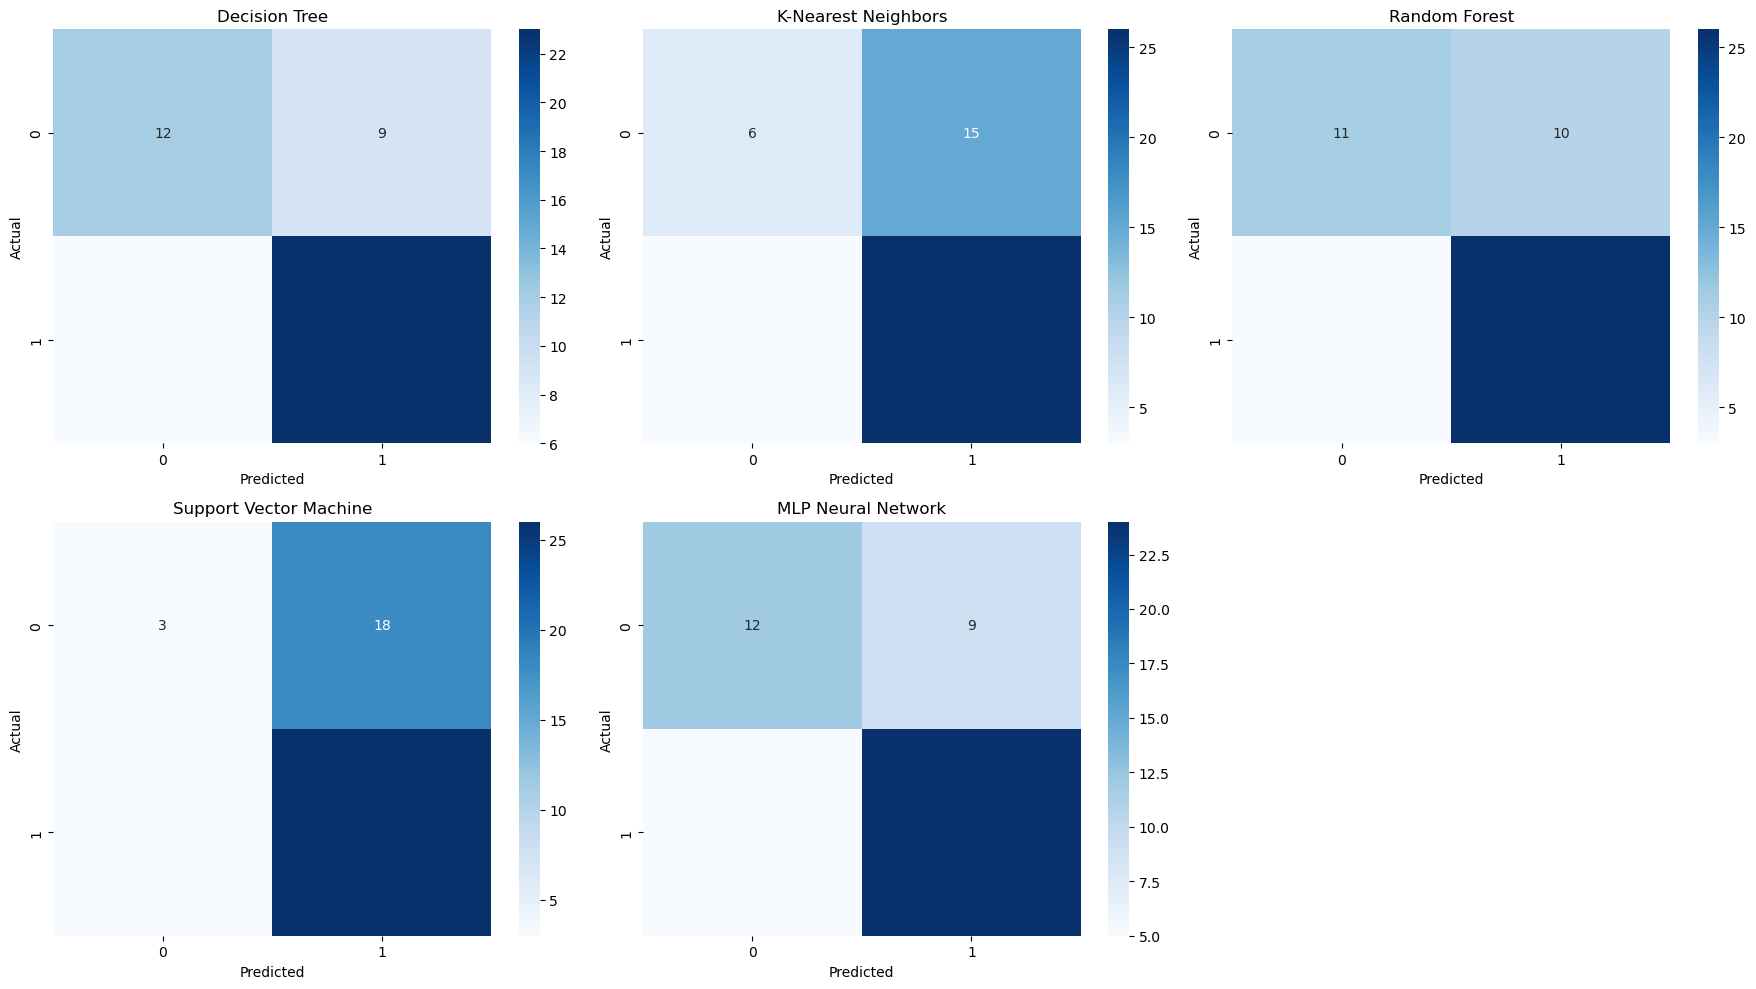

In [224]:
# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(ax, conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_name}')

# Train the models and store confusion matrices
conf_matrices = {}
for model_name, model in models.items():
    if model_name == "MLP Neural Network":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[model_name] = conf_matrix

# Plot the confusion matrices in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each confusion matrix
for ax, (model_name, conf_matrix) in zip(axes, conf_matrices.items()):
    plot_confusion_matrix(ax, conf_matrix, model_name)

# Remove any unused subplots
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<h3>TESTE 3<h3\>

Usar apenas as 20 variáveis com melhor feature value.

In [225]:
features = ["AFP", "Leucocytes", "Age", "Metastasis", "INR", "Ferritin", "PS", "HBcAb", "Nodules", "MCV", "TP", "Total_Bil", "ALT", "GGT", "Hemoglobin", "Alcohol", "Platelets", " Albumin", "AST", "HBeAg"]
target = "Class"
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [226]:
# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

In [227]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    return conf_matrix


# Evaluate each model and print metrics
conf_matrices = {}
for model_name, model in models.items():
    conf_matrix = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    conf_matrices[model_name] = conf_matrix

Model: Decision Tree
Accuracy: 0.64
Confusion Matrix:
[[11 10]
 [ 8 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        21
           1       0.68      0.72      0.70        29

    accuracy                           0.64        50
   macro avg       0.63      0.62      0.62        50
weighted avg       0.64      0.64      0.64        50

Model: K-Nearest Neighbors
Accuracy: 0.64
Confusion Matrix:
[[ 6 15]
 [ 3 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.29      0.40        21
           1       0.63      0.90      0.74        29

    accuracy                           0.64        50
   macro avg       0.65      0.59      0.57        50
weighted avg       0.65      0.64      0.60        50

Model: Random Forest
Accuracy: 0.70
Confusion Matrix:
[[10 11]
 [ 4 25]]
Classification Report:
              precision    recall  f1-score   suppor

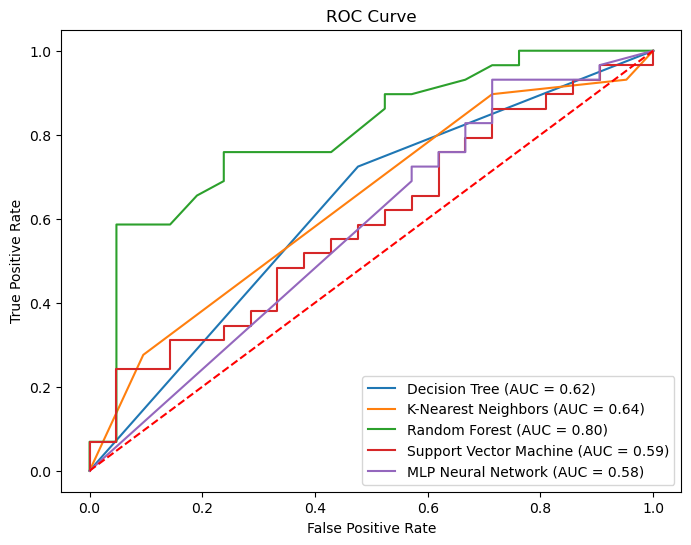

In [228]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    except AttributeError:
        y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.legend()
plt.show()

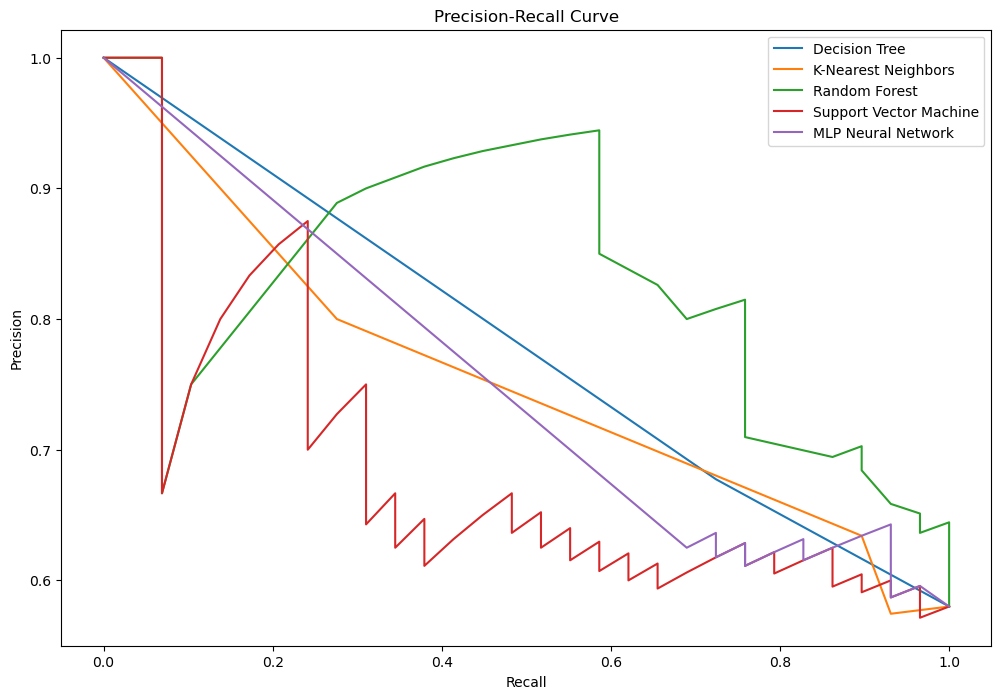

In [229]:
from sklearn.metrics import precision_recall_curve

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, label=f'{model_name}')

# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(probability=True, random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Plot Precision-Recall curves for each model
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

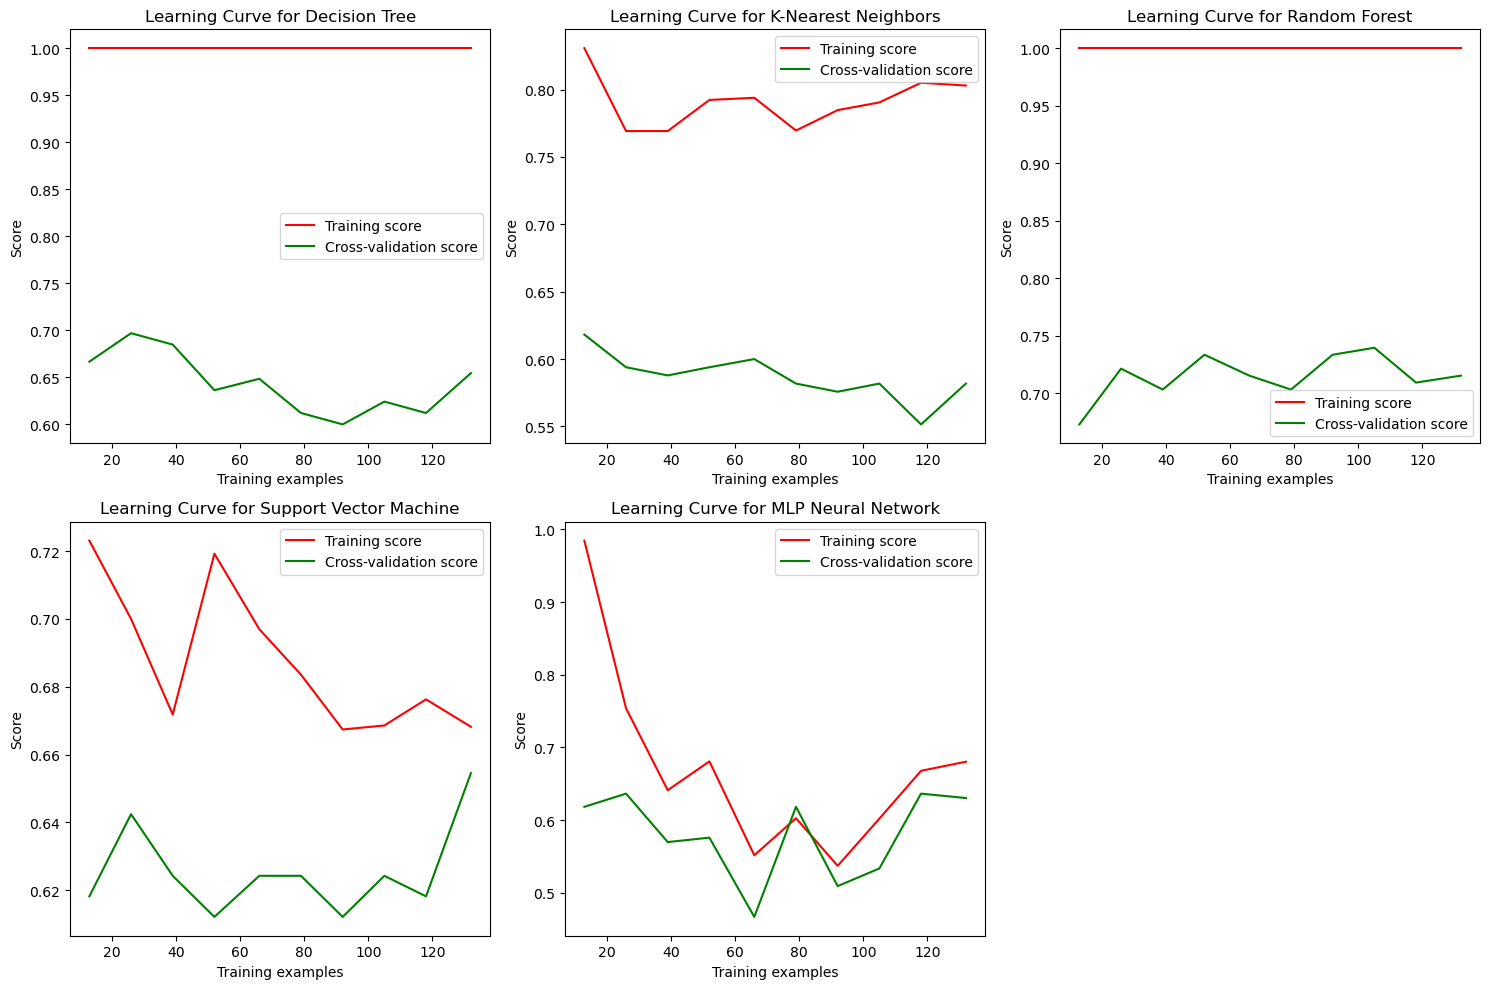

In [230]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    ax.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.set_title(f'Learning Curve for {model_name}')
    ax.legend(loc='best')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Apply learning curve to all algorithms and plot in the grid
for (model_name, model), ax in zip(models.items(), axes.flatten()[:len(models)]):
    plot_learning_curve(model, X, y, model_name, ax)

# Remove the empty subplot
if len(models) < 6:
    for ax in axes.flatten()[len(models):]:
        fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

/home/danny/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


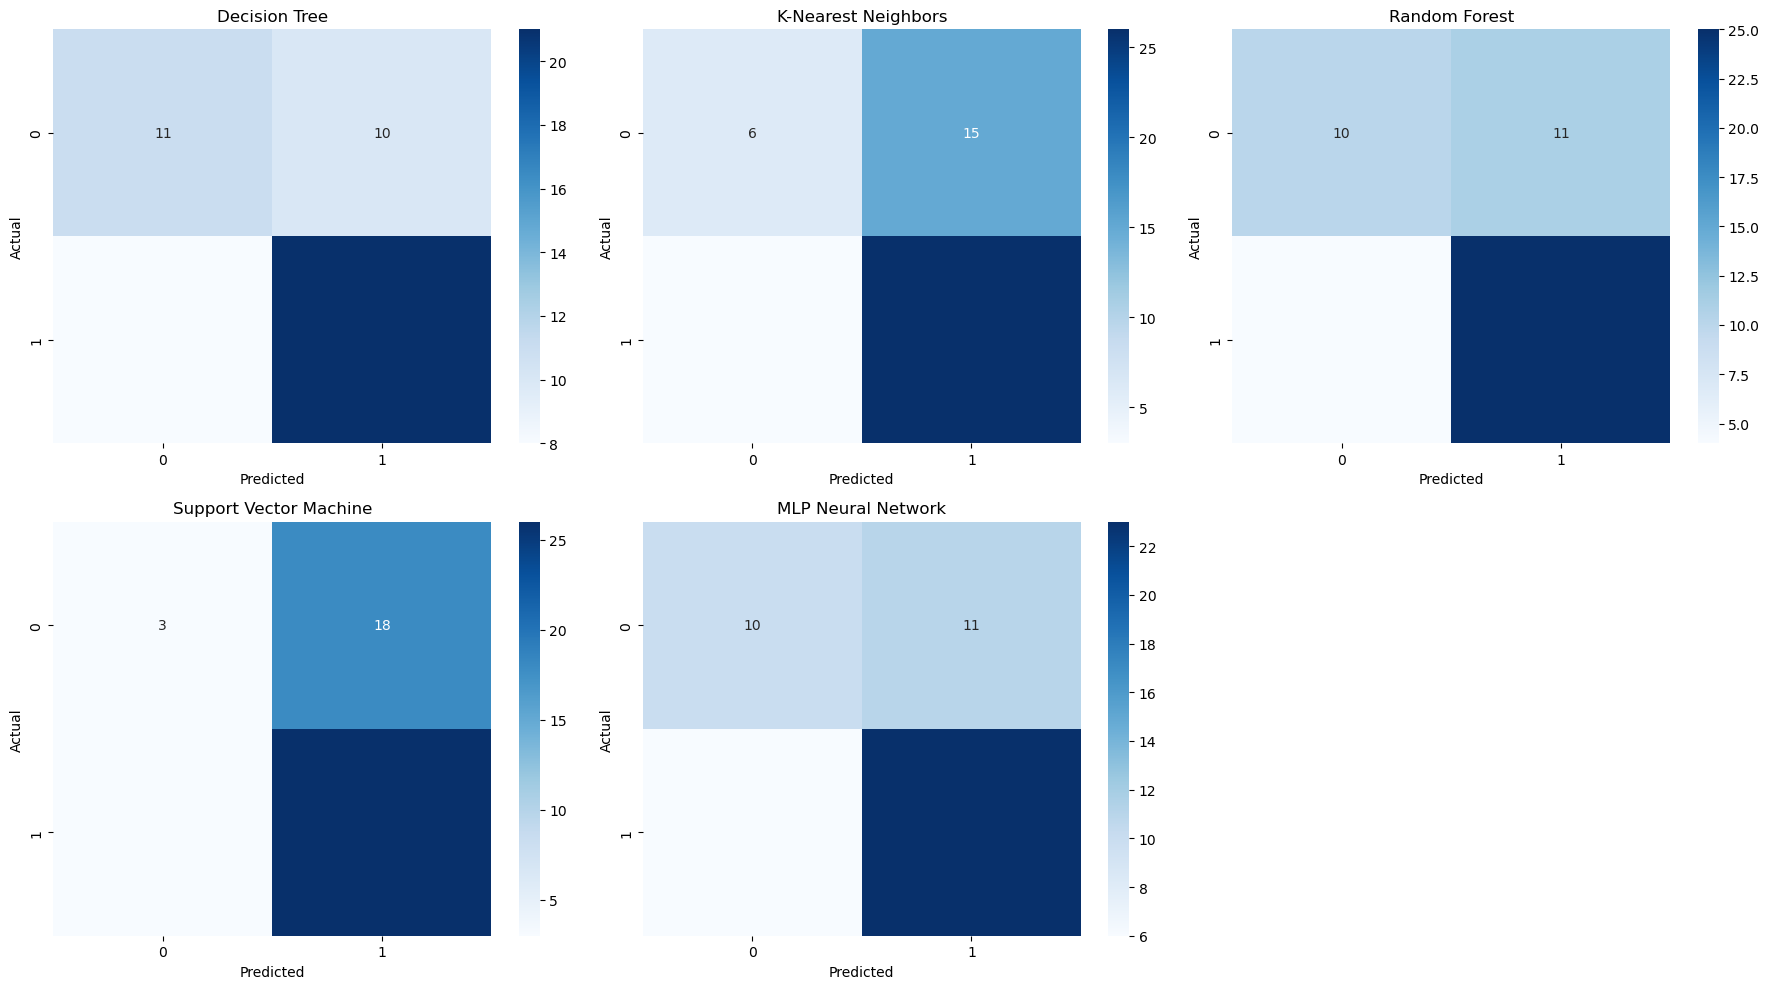

In [231]:
# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(ax, conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_name}')

# Train the models and store confusion matrices
conf_matrices = {}
for model_name, model in models.items():
    if model_name == "MLP Neural Network":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[model_name] = conf_matrix

# Plot the confusion matrices in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each confusion matrix
for ax, (model_name, conf_matrix) in zip(axes, conf_matrices.items()):
    plot_confusion_matrix(ax, conf_matrix, model_name)

# Remove any unused subplots
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<h3>TESTE 4<h3\>

Usar apenas as 20 variáveis com melhor feature value.

In [232]:
features = ['AFP','Leucocytes','Age','Metastasis','INR']
target = "Class"
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [233]:
# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

In [234]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    return conf_matrix


# Evaluate each model and print metrics
conf_matrices = {}
for model_name, model in models.items():
    conf_matrix = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
    conf_matrices[model_name] = conf_matrix

Model: Decision Tree
Accuracy: 0.62
Confusion Matrix:
[[12  9]
 [10 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56        21
           1       0.68      0.66      0.67        29

    accuracy                           0.62        50
   macro avg       0.61      0.61      0.61        50
weighted avg       0.62      0.62      0.62        50

Model: K-Nearest Neighbors
Accuracy: 0.64
Confusion Matrix:
[[12  9]
 [ 9 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57        21
           1       0.69      0.69      0.69        29

    accuracy                           0.64        50
   macro avg       0.63      0.63      0.63        50
weighted avg       0.64      0.64      0.64        50

Model: Random Forest
Accuracy: 0.66
Confusion Matrix:
[[13  8]
 [ 9 20]]
Classification Report:
              precision    recall  f1-score   suppor

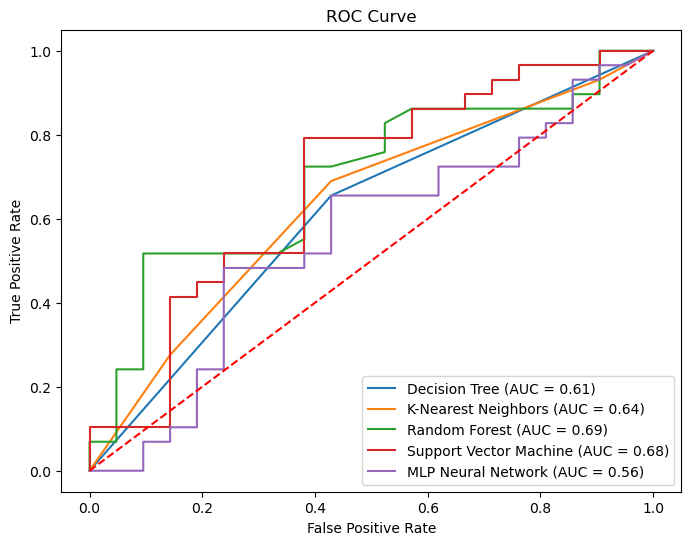

In [235]:
from sklearn.metrics import roc_curve, roc_auc_score
def plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    try:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    except AttributeError:
        y_prob = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    plot_roc_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.legend()
plt.show()

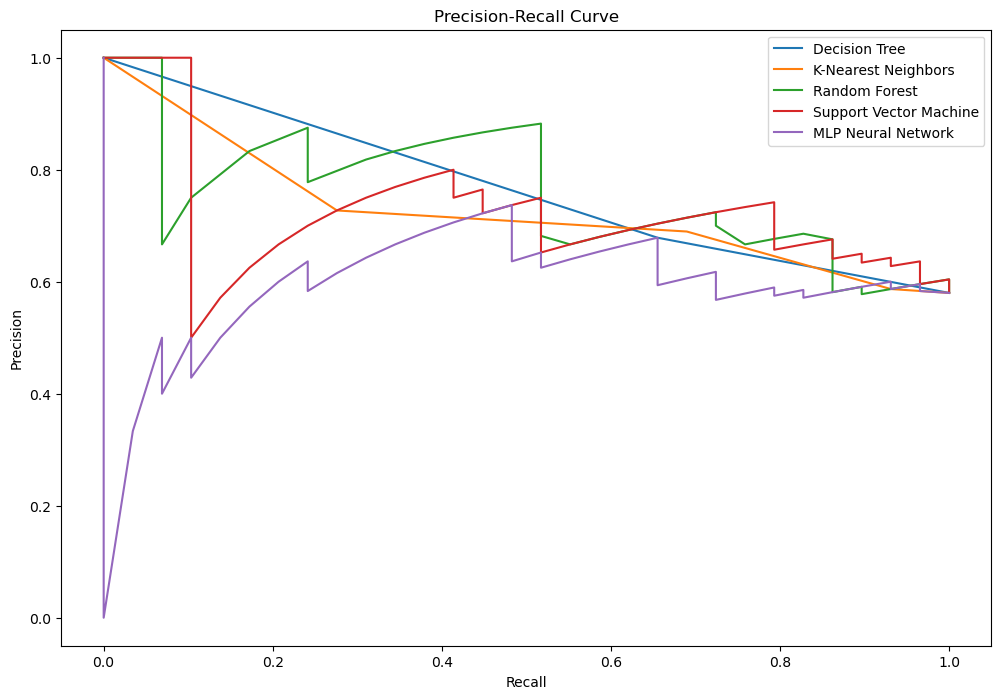

In [236]:
from sklearn.metrics import precision_recall_curve

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, label=f'{model_name}')

# Initialize the classifiers
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=0),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Random Forest": RandomForestClassifier(random_state=0),
    "Support Vector Machine": SVC(probability=True, random_state=0),
    "MLP Neural Network": MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001,
                                        learning_rate='adaptive', max_iter=200, random_state=0)
}

# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Plot Precision-Recall curves for each model
plt.figure(figsize=(12, 8))
for model_name, model in models.items():
    plot_precision_recall_curve(model, X_train, X_test, y_train, y_test, model_name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

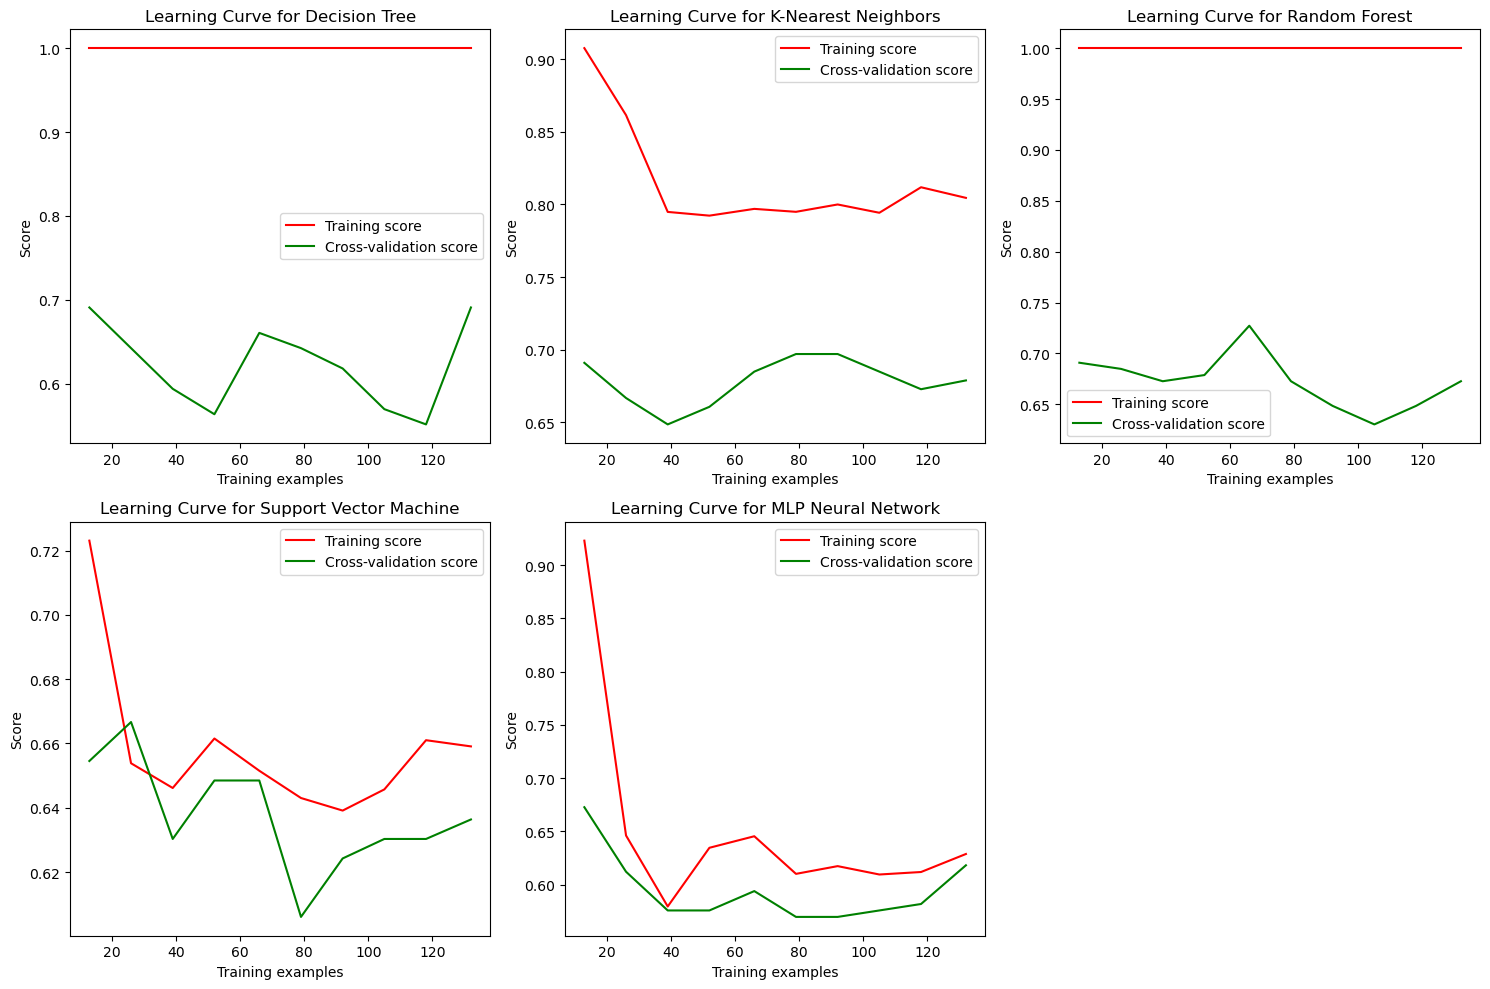

In [237]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    ax.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.set_title(f'Learning Curve for {model_name}')
    ax.legend(loc='best')

# Create a 2x3 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Apply learning curve to all algorithms and plot in the grid
for (model_name, model), ax in zip(models.items(), axes.flatten()[:len(models)]):
    plot_learning_curve(model, X, y, model_name, ax)

# Remove the empty subplot
if len(models) < 6:
    for ax in axes.flatten()[len(models):]:
        fig.delaxes(ax)

# Adjust layout
plt.tight_layout()
plt.show()

/home/danny/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


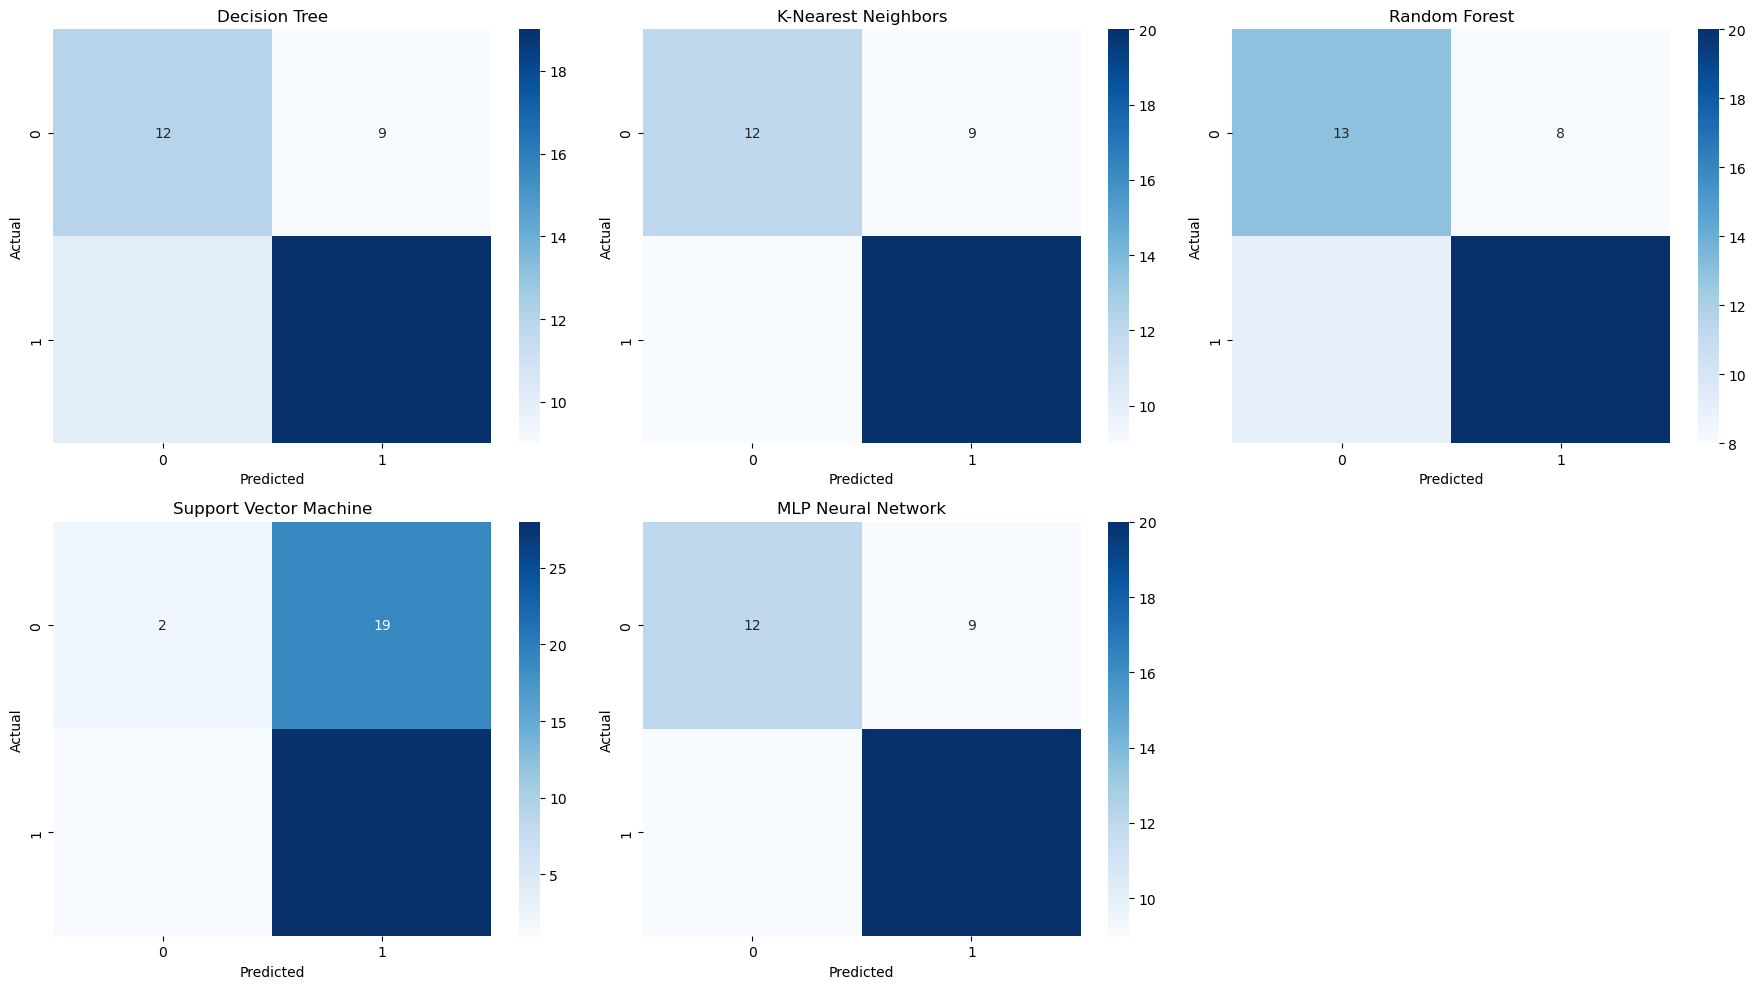

In [238]:
# Separate the features and target variable
X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalize the data for MLP
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to plot confusion matrix
def plot_confusion_matrix(ax, conf_matrix, model_name):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'], ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_name}')

# Train the models and store confusion matrices
conf_matrices = {}
for model_name, model in models.items():
    if model_name == "MLP Neural Network":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices[model_name] = conf_matrix

# Plot the confusion matrices in a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each confusion matrix
for ax, (model_name, conf_matrix) in zip(axes, conf_matrices.items()):
    plot_confusion_matrix(ax, conf_matrix, model_name)

# Remove any unused subplots
for i in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

<img src="grafi2.png" />

## Interpretation of Results <a id="Interpretation-of-Results"></a>

Random Forest is the algorithm that provides the best accuracy values overall.

Since the dataset with the highest mean of accuracy values was the one from test 1 this will be the one will the focus of this analysis.

Using the 10 variables with the best feature value turned out to give off the best accuracy levels.

On the ROC curve since the values are always in between 0.5 and 1, never being less than 0.5, it can be concluded that the model despite not being perfect ir is pretty efficient.


In the precision-recall graph the Random Forest, Support Vector Machine and MLP Neural Network present inconsistent curves, while decision tree has the most linear one.


In the confusion matrix, the Support Vector Machine presents a lot of False positives, which is the opposite of what was wanted for the model in study.


In general, the variables with the most feature importance are 'AFP','Leucocytes','Age','Metastasis' and 'INR'. However using only these five variables does not improve the quality of the model.

In the learning curve Support Vector Machine and MLP Neural Network are the ones where the curves are the closest.